# Problem
Can the sale amount for properties in Conneticut be predicted?

Also, where are the best places to buy? Best places to sell? places with the best/worst sale ratios?

Through understanding this dataset, real estate buyers and sellers in Conneticut can make smart sales and purchases.

# Data Collection
Data sourced from Connecticut Open Data

https://data.ct.gov/Housing-and-Development/Real-Estate-Sales-2001-2023-GL/5mzw-sjtu/about_data

In [1]:
import pandas as pd
df = pd.read_csv(
    'Real_Estate_Sales_2001-2023_GL.csv',
    dtype = {
        'Serial Number':'int64',
        'List Year':'float64',
        'Date Recorded':'string',
        'Town':'string',
        'Address':'string',
        'Assessed Value':'float64',
        'Sale Amount':'float64',
        #'Sales Ratio':'float64', This crashes since there is a value which cannot be converted to a float
        'Property Type':'string',
        'Residential Type':'string',
        'Non Use Code':'string',
        'Assessor Remarks':'string',
        'OPM remarks':'string',
        'Location':'string',
    },
)

C:\Users\jonah\AppData\Local\Temp\ipykernel_34848\3299731076.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


# Data Understanding

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141722 entries, 0 to 1141721
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1141722 non-null  int64  
 1   List Year         1141722 non-null  float64
 2   Date Recorded     1141720 non-null  string 
 3   Town              1141722 non-null  string 
 4   Address           1141671 non-null  string 
 5   Assessed Value    1141722 non-null  float64
 6   Sale Amount       1141722 non-null  float64
 7   Sales Ratio       1141722 non-null  object 
 8   Property Type     759276 non-null   string 
 9   Residential Type  738804 non-null   string 
 10  Non Use Code      324807 non-null   string 
 11  Assessor Remarks  181090 non-null   string 
 12  OPM remarks       14346 non-null    string 
 13  Location          341241 non-null   string 
dtypes: float64(3), int64(1), object(1), string(9)
memory usage: 121.9+ MB


Features like Non Use Code, Assessor Remarks, OPM remarks, Location have over half of their entrances missing

In [3]:
df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177     2020.0    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225     2020.0    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348     2020.0    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090     2020.0    12/14/2020  Ansonia      57 PLATT ST   
4         210288     2021.0    06/20/2022     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0      0.5354   Residential    Single Family   
1        110500.0     239900.0      0.4606   Residential     Three Family   
2        150500.0     325000.0       0.463    Commercial             <NA>   
3        127400.0     202500.0      0.6291   Residential       Two Family   
4        179990.0     362500.0      0.4965   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0         <NA>             <NA>        <NA>   
1         <NA>             <NA>        <NA>   
2         <NA>             <NA>        <NA>   
3         <NA>             <NA>        <NA>   
4         <NA>             <NA>        <NA>   

                             Location  
0          POINT (-73.06822 41.35014)  
1                                <NA>  
2                                <NA>  
3                                <NA>  
4  POINT (-72.879115982 41.773452988)

In [4]:
df.tail()

Serial Number  List Year Date Recorded         Town  \
1141717         230299     2023.0    04/19/2024  Southington   
1141718         230568     2023.0    05/15/2024   West Haven   
1141719         230217     2023.0    02/20/2024  Southington   
1141720         230097     2023.0    05/30/2024     Old Lyme   
1141721         230383     2023.0    06/06/2024      Shelton   

                               Address  Assessed Value  Sale Amount  \
1141717  580-23 MERIDEN WATERBURY TPKE         26540.0     509900.0   
1141718                 165 MILTON AVE        148050.0     400300.0   
1141719                    242 LAZY LN        177340.0     334750.0   
1141720               21 BUTTONBALL RD          8030.0      35000.0   
1141721               512 ANTELOPE TRL        306460.0     659813.0   

        Sales Ratio Property Type Residential Type             Non Use Code  \
1141717      0.0520   Residential            Condo  07 - Change in Property   
1141718      0.3698   Residential    Single Family                     <NA>   
1141719      0.5297   Residential    Single Family                     <NA>   
1141720      0.2294   Vacant Land             <NA>                     <NA>   
1141721      0.4645   Residential            Condo               25 - Other   

                       Assessor Remarks                       OPM remarks  \
1141717  NEW CONSTRUCTION OVER 55 CONDO                              <NA>   
1141718                            <NA>                              <NA>   
1141719                            <NA>                              <NA>   
1141720    DEVELOPERS LOT FOR NEW CONST                              <NA>   
1141721                       89 33 512  PER MLS CLOSING PRICE = $675,000   

                           Location  
1141717  POINT (-72.86373 41.56032)  
1141718  POINT (-72.97401 41.24665)  
1141719  POINT (-72.88193 41.62094)  
1141720  POINT (-72.30557 41.29054)  
1141721  POINT (-73.13448 41.29345)

Sales Ratio = Assessed Value / Sale Amount

Low Sales Ratio (< 1): sold for less than assessed value -> bad for buyers, good for sellers

High sales Ratio (> 1): sold for more than assessed value -> good for buyers, bad for sellers

# Preprocessing

## Data Cleaning

In [5]:
df['Date Recorded'].sort_values(key=lambda x: x.str[6:]).head(10)

1128837    11/08/0023
1132341    11/08/0023
1133088    12/06/0023
1123783    12/30/0023
1133393    11/24/0023
1102626    10/20/0023
1133557    11/22/0023
1122962    11/23/0023
1133803    10/26/0023
1133902    10/15/0023
Name: Date Recorded, dtype: string

Date Recorded seems to have some bad values. There many rows that have years listed in Date Recorded listed as 0023 and 0024. 

In [6]:
df['Date Recorded'] = df['Date Recorded'].str.replace("/00", "/20")
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [7]:
df['Sales Ratio'].apply(type).value_counts()

Sales Ratio
<class 'float'>    1114112
<class 'str'>        27610
Name: count, dtype: int64

Since Sales Ratio contains floats and strings, we need to convert all of the strings to floats

In [45]:
def is_float(x)->None:
    try:
        float(x)
        return True
    except:
        print(x)
        return False
sales_ratio_strings = df['Sales Ratio'][df['Sales Ratio'].apply(lambda x: not isinstance(x, float))]
sales_ratio_strings.apply(is_float).value_counts()

Series([], Name: count, dtype: int64)

Of all the strings in Sales Ratio, there is only one which cannot be converted to a float, so we can fix this individual datapoint.

Now every element in Sales Ratio is a float

We can also convert Date Recorded to datetimes.

In [9]:
df['Sales Ratio'] = df['Sales Ratio'].replace('1,787.3333','1787.3333')
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'])

In [10]:
df['Property Type'].value_counts()

Property Type
Single Family     401612
Residential       190628
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         9957
Commercial          7828
Four Family         2150
Apartments          1646
Industrial          1029
Public Utility        12
Name: count, dtype: Int64

In [11]:
df['Residential Type'].value_counts()

Residential Type
Single Family    535359
Condo            145436
Two Family        37173
Three Family      17670
Four Family        3166
Name: count, dtype: Int64

In [12]:
row = 500000
df[['Property Type','Residential Type']][row:row + 10]

Property Type Residential Type
500000     Two Family       Two Family
500001  Single Family    Single Family
500002   Three Family     Three Family
500003           <NA>             <NA>
500004  Single Family    Single Family
500005           <NA>             <NA>
500006  Single Family    Single Family
500007     Two Family       Two Family
500008           <NA>             <NA>
500009  Single Family    Single Family

It seems that some values in Residential Type have been copied to Property type. These columns can be merged by replacing the residential categories in Property Type with their respective residential category in Residential Type

In [13]:
import numpy as np
for res_type in df['Residential Type'].unique():
    df.loc[df['Residential Type']==res_type,'Property Type'] = res_type
df = df.drop(['Residential Type'],axis=1)
df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177     2020.0    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225     2020.0    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348     2020.0    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090     2020.0    2020-12-14  Ansonia      57 PLATT ST   
4         210288     2021.0    2022-06-20     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount  Sales Ratio  Property Type Non Use Code  \
0        133000.0     248400.0       0.5354  Single Family         <NA>   
1        110500.0     239900.0       0.4606   Three Family         <NA>   
2        150500.0     325000.0       0.4630     Commercial         <NA>   
3        127400.0     202500.0       0.6291     Two Family         <NA>   
4        179990.0     362500.0       0.4965          Condo         <NA>   

  Assessor Remarks OPM remarks                            Location  
0             <NA>        <NA>          POINT (-73.06822 41.35014)  
1             <NA>        <NA>                                <NA>  
2             <NA>        <NA>                                <NA>  
3             <NA>        <NA>                                <NA>  
4             <NA>        <NA>  POINT (-72.879115982 41.773452988)

From Connecticut Open Data:

"Non usable sale code typically means the sale price is not reliable for use in the determination of a property value."

Rows with Non Use Codes should be removed since they're not accurate

In [14]:
df = df[df['Non Use Code'].isna()]
df = df.drop(['Non Use Code'],axis=1)

## Feature Engineering

Using the Address feature, we can make a Street feature

In [15]:
import re

bad_numbers = '0123456789'
bad_chars = ' ~`!@#$%^&*()-+={}[]\\:;\'"<>,./?'
bad_letters = 'qwertyuiopasdfghjklzxcvbnmQWERTYUIOPASDFGHJKLZXCVBNM'

def remove_direction(street:str)->str:
    for end_direction in [' N', ' E', ' S', ' W', ' NORTH', 'EAST', ' SOUTH', ' WEST', ' NO', ' SO', ' UT']:
        if street.endswith(end_direction):
            street = street.removesuffix(end_direction)
    return street

def remove_lot(street:str)->str:
    if ' LT' in street or street.startswith('LT '):
        street = street.replace(' LT', ' LOT ')
    if ' LOTS' in street or street.startswith('LOTS '):
        street = street.replace(' LOTS', ' LOT ')

    if re.search(r'(?<![A-Za-z])LOT ', street):
        split_street = street.split('LOT')
        if split_street:
            street = split_street[0]
        elif len(split_street) > 1:
            street = split_street[1]
        street = street.strip(bad_chars)
    if street.startswith('LOT '):
        street = street.removeprefix('LOT ')
    if street.endswith(' LOT'):
        street = street.removesuffix(' LOT')
    return street

def remove_unit(street:str)->str:
    if re.search(r'(?<![A-Za-z])UNIT ', street):
        split_street = street.split('UNIT')
        if split_street:
            street = split_street[0]
        elif len(split_street) > 1:
            street = split_street[1]
        street = street.strip(bad_chars)
    return street
    
def remove_dock(street:str)->str:
    if (
        street.endswith(' RD')
        or street.endswith(' DR') 
        or street.endswith(' STREET') 
        or street.endswith(' ROAD') 
        or street.endswith(' DRIVE')
        or street.endswith(' ST')
        or street.endswith(' LN')        
        or street.endswith(' LANE')
    ):
        return street.strip(bad_chars+bad_numbers)
        
    if re.search(r'(?<![A-Za-z])DOCK(?![A-Za-z])', street):
        if street.endswith('DOCK') and 'OYSTER' not in street:
            street = street.removesuffix('DOCK')
        split_street = street.split('DOCK')
        if split_street:
            street = split_street[0]
        elif len(split_street) > 1:
            street = split_street[1]

    street = street.strip(bad_chars+bad_numbers)       
  
    return street
    
def format_route(street:str)->str:
    street = remove_lot(street)
    street = street.lstrip(bad_numbers).rstrip(bad_chars + bad_letters)
    return street

def format_street(address:str)->str:
    if pd.isna(address):
        return address

    street = address.lstrip(bad_numbers)
    if street.startswith('ROUTE '):
        street = format_route(street)
        return street
    if street.startswith('RT '):
        street = address.replace('RT','ROUTE')
        street = format_route(street)
        return street

    if 'UNIT' in street:
        street = remove_unit(street)

    if 'LOT' in street or 'LT' in street:
        street = remove_lot(street)

    if 'DOCK' in street:
        street = remove_dock(street)

    street = street.strip(bad_chars+bad_numbers)
    #street = re.sub(r'\s+UT$', '', street, flags=re.IGNORECASE)
    street = re.sub(r'#[A-Za-z]', '', street)
    street = re.sub(r'\d+[A-Za-z]$', '', street)
    street = re.sub(r'[A-Za-z]\d+$', '', street)
    street = re.sub(r'^[A-Za-z]\d+', '', street)
    street = re.sub(r'^\d+[A-Za-z]', '', street)
    street = street.strip(bad_chars+bad_numbers)
    street = re.sub(r'^[A-Za-z] ', '', street)
    street = re.sub(r' [A-Za-z]$', '', street)
    street = remove_direction(street)
    street = street.strip(bad_chars+bad_numbers)     
    return street
    
street = df['Address'].apply(format_street)

simple_streets = [
    'MAIN ST',
    'SUMMER ST',
    'NORDEN PL',
    'WASHINGTON BLVD',
    'NORTH WATER ST',
    'MAIN AVE',
    #'HERITAGE VLG',
    'NORTH AVENUE',
    'PARK AVE',
    'FREDERICK STREET',
    'GLENDALE AVENUE',
    'LAKESIDE BLVD',
    'FIELD POINT ROAD',
    'LAFAYETTE BLVD',
    'EAST HIGH ST',
    'WHALLEY AVENUE',
    'LONG HILL RD',
    'GLENBROOK ROAD',
    'NOB HILL',
    'GAYLORD MT RD',
    'VENICE AVE',
    'BOSTON AVENUE',
    'THOMPSON RD',
    'CHERRY HILL DR',
    'HORSE POND RD',
    'CARTRIGHT',
    'MADISON AVE',
    'ELY AVE',
    'LAKESIDE DR',
    'JOYCE RD',
    'NEW NORWALK',
    'HARBOR DRIVE',
    'BREAKWATER KEY',
    'GLASGO RD',
    'AETNA AVE',
    'NAUBUC AVE',
    'KELLY RD',
    'SOUTH AVE',    
    'CORPORATE DR',
    'HUNTINGTON ST',

]

#simple_streets=[]

for street_name in simple_streets:
    street = street.mask(
        street.str.contains(
            street_name,
            case=False,
            na=False,
        ),
        street_name,
    )

street_replacements = {
    'HERITAGE VILLAGE':'HERITAGE VLG',
    'HERITAGE VLD':'HERITAGE VLG',
    'S WHITNEY':'SOUTH WHITNEY ST',
    'STRAWBERRY HL AVE':'STRAWBERRY HILL AVE',
    'NIANTIC DOCKO':'NIANTIC DOCKOMINIUM',
    'NIANTIC':'NIANTIC DOCKOMINIUM',
    'SOUTHFIELD AVE DOCK':'SOUTHFIELD AVE',
    'BYRAM':'BYRAM DOCK ST',
    'WEST ELM SSTREET':'WEST ELM STREET',
}

for street_name in street_replacements:
    street = street.mask(
        street.str.contains(
            street_name,
            case=False,
            na=False,
        ),
        street_replacements[street_name]
    )

street = street + ', ' + df['Town']

df.insert(len(df.columns),'Street',street)

Using the Location feature, we can make X Location and y Location features

In [16]:
location = df['Location'].str.lstrip('POINT (').str.rstrip(')')
#x_location, y_location = 
locations = location.str.split(' ',expand=True)
X_location = locations[0].astype('float64')
y_location = locations[1].astype('float64')
df.insert(len(df.columns),'X Location',X_location)
df.insert(len(df.columns),'y Location',y_location)
df = df.drop(['Location'],axis=1)

Using the Date Recorded feature, we can make Month Sold, Year Sold, and Years on Market features

In [17]:
df['sin(Day of Week Sold)'] = np.sin(2 * np.pi * df['Date Recorded'].dt.day_of_week / 7)
df['cos(Day of Week Sold)'] = np.cos(2 * np.pi * df['Date Recorded'].dt.day_of_week / 7)

df['sin(Day of Year Sold)'] = np.sin(2 * np.pi * df['Date Recorded'].dt.day_of_year / 365)
df['cos(Day of Year Sold)'] = np.cos(2 * np.pi * df['Date Recorded'].dt.day_of_year / 365)

df['Year Sold'] = df['Date Recorded'].dt.year.astype('Float64')
df['Years on Market'] = df['Year Sold'] - df['List Year']

df.head()

Serial Number  List Year Date Recorded     Town          Address  \
0        2020177     2020.0    2021-04-14  Ansonia    323 BEAVER ST   
1        2020225     2020.0    2021-05-26  Ansonia   152 JACKSON ST   
2        2020348     2020.0    2021-09-13  Ansonia  230 WAKELEE AVE   
3        2020090     2020.0    2020-12-14  Ansonia      57 PLATT ST   
4         210288     2021.0    2022-06-20     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount  Sales Ratio  Property Type Assessor Remarks  \
0        133000.0     248400.0       0.5354  Single Family             <NA>   
1        110500.0     239900.0       0.4606   Three Family             <NA>   
2        150500.0     325000.0       0.4630     Commercial             <NA>   
3        127400.0     202500.0       0.6291     Two Family             <NA>   
4        179990.0     362500.0       0.4965          Condo             <NA>   

  OPM remarks                Street  X Location  y Location  \
0        <NA>    BEAVER ST, Ansonia  -73.068220   41.350140   
1        <NA>   JACKSON ST, Ansonia         NaN         NaN   
2        <NA>  WAKELEE AVE, Ansonia         NaN         NaN   
3        <NA>     PLATT ST, Ansonia         NaN         NaN   
4        <NA>     BYRON DRIVE, Avon  -72.879116   41.773453   

   sin(Day of Week Sold)  cos(Day of Week Sold)  sin(Day of Year Sold)  \
0               0.974928              -0.222521               0.976011   
1               0.974928              -0.222521               0.587785   
2               0.000000               1.000000              -0.953681   
3               0.000000               1.000000              -0.271958   
4               0.000000               1.000000               0.196673   

   cos(Day of Year Sold)  Year Sold  Years on Market  
0              -0.217723     2021.0              1.0  
1              -0.809017     2021.0              1.0  
2              -0.300820     2021.0              1.0  
3               0.962309     2020.0              0.0  
4              -0.980469     2022.0              1.0

Any row with Years on Market less than 0 is invalid, and needs to be removed

In [18]:
df = df[df['Years on Market']>=0]

Now that new features have been added, null values can be replaced

In [19]:
df = df[df['Date Recorded'].notnull()]
#df['Date Recorded'] = df['Date Recorded'].map(lambda x: x.toordinal()).astype('Float64')
df = df.drop(['Date Recorded'],axis=1)
for col in df.select_dtypes(include='string'):
    df[col] = df[col].fillna('Missing')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816871 entries, 0 to 1141720
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Serial Number          816871 non-null  int64  
 1   List Year              816871 non-null  float64
 2   Town                   816871 non-null  string 
 3   Address                816871 non-null  string 
 4   Assessed Value         816871 non-null  float64
 5   Sale Amount            816871 non-null  float64
 6   Sales Ratio            816871 non-null  float64
 7   Property Type          816871 non-null  string 
 8   Assessor Remarks       816871 non-null  string 
 9   OPM remarks            816871 non-null  string 
 10  Street                 816871 non-null  string 
 11  X Location             251968 non-null  float64
 12  y Location             251968 non-null  float64
 13  sin(Day of Week Sold)  816871 non-null  float64
 14  cos(Day of Week Sold)  816871 non-null  

Now there are no more mixed types

In [20]:
df.describe()

Serial Number      List Year  Assessed Value   Sale Amount  \
count   8.168710e+05  816871.000000    8.168710e+05  8.168710e+05   
mean    6.053749e+05    2011.552516    2.409097e+05  4.154772e+05   
std     8.074416e+06       7.191449    6.905130e+05  1.238287e+06   
min     2.100000e+01    2001.000000    0.000000e+00  0.000000e+00   
25%     3.071800e+04    2004.000000    9.555000e+04  1.720000e+05   
50%     8.042100e+04    2012.000000    1.481900e+05  2.599000e+05   
75%     1.804270e+05    2018.000000    2.373300e+05  4.004000e+05   
max     2.000500e+09    2023.000000    1.106702e+08  1.630000e+08   

         Sales Ratio     X Location     y Location  sin(Day of Week Sold)  \
count  816871.000000  251968.000000  251968.000000          816871.000000   
mean        0.795164     -72.887446      41.490848               0.327360   
std       182.627422       0.428519       0.259121               0.512585   
min         0.000000     -85.168900      37.591070              -0.974928   
25%         0.472740     -73.204200      41.282710               0.000000   
50%         0.578831     -72.904235      41.488999               0.433884   
75%         0.691492     -72.640583      41.710380               0.781831   
max    165060.000000     -71.788500      44.934590               0.974928   

       cos(Day of Week Sold)  sin(Day of Year Sold)  cos(Day of Year Sold)  \
count          816871.000000          816871.000000          816871.000000   
mean               -0.014384              -0.068751              -0.108345   
std                 0.793654               0.695952               0.706531   
min                -0.900969              -0.999991              -0.999963   
25%                -0.900969              -0.752667              -0.819015   
50%                -0.222521              -0.145799              -0.200891   
75%                 0.623490               0.601624               0.570242   
max                 1.000000               0.999991               1.000000   

         Year Sold  Years on Market  
count     816871.0         816871.0  
mean   2012.299931         0.747415  
std       7.194271         0.434509  
min         2001.0              0.0  
25%         2005.0              0.0  
50%         2012.0              1.0  
75%         2019.0              1.0  
max         2024.0              3.0

Outlier for 165060

## Removing Outliers

In [21]:
df.sort_values(by = 'Sales Ratio', ascending = False).head(10)

Serial Number  List Year      Town                      Address  \
188218          20181     2002.0  Hartford                57 GILLETT ST   
604289          10272     2010.0    Hamden               642 NEWHALL ST   
33097          200018     2020.0   Norwich  202 R NORTH WAWECUS HILL RD   
31610          200268     2020.0   Norwich             174 WEST TOWN ST   
656943          11001     2011.0   Chester                46 STRAITS RD   
52339          200319     2020.0   Norwich      303 MOHEGAN PARK RD #57   
656073          11004     2011.0   Chester               84 WIG HILL RD   
637600          10227     2010.0    Hamden            134 SANFORD ST U6   
866982         160208     2016.0   Meriden          42 BRECKENRIDGE AVE   
46440          200868     2020.0   Norwich             101 ATLANTIC AVE   

        Assessed Value  Sale Amount    Sales Ratio  Property Type  \
188218        165060.0          1.0  165060.000000        Missing   
604289     110670208.0     208900.0     529.776008  Single Family   
33097         672400.0      30000.0      22.413300    Vacant Land   
31610         229700.0      22000.0      10.440900     Commercial   
656943        396440.0      45000.0       8.809778  Single Family   
52339          46700.0       5405.0       8.640100  Single Family   
656073        231950.0      27000.0       8.590741  Single Family   
637600        164570.0      20000.0       8.228500          Condo   
866982         40460.0       5000.0       8.092000        Missing   
46440         161000.0      20000.0       8.050000  Single Family   

                   Assessor Remarks OPM remarks  \
188218                      Missing     Missing   
604289                      Missing     Missing   
33097   VACANT LAND W/ OUTBUILDINGS     Missing   
31610                       Missing     Missing   
656943                      Missing     Missing   
52339                       Missing     Missing   
656073                      Missing     Missing   
637600                      Missing     Missing   
866982                      Missing     Missing   
46440                       Missing     Missing   

                                Street  X Location  y Location  \
188218            GILLETT ST, Hartford         NaN         NaN   
604289              NEWHALL ST, Hamden         NaN         NaN   
33097   NORTH WAWECUS HILL RD, Norwich         NaN         NaN   
31610            WEST TOWN ST, Norwich         NaN         NaN   
656943             STRAITS RD, Chester         NaN         NaN   
52339         MOHEGAN PARK RD, Norwich    -72.0655    41.55307   
656073            WIG HILL RD, Chester         NaN         NaN   
637600              SANFORD ST, Hamden         NaN         NaN   
866982       BRECKENRIDGE AVE, Meriden         NaN         NaN   
46440            ATLANTIC AVE, Norwich         NaN         NaN   

        sin(Day of Week Sold)  cos(Day of Week Sold)  sin(Day of Year Sold)  \
188218               0.781831               0.623490              -0.746972   
604289               0.974928              -0.222521               0.774884   
33097                0.974928              -0.222521              -0.992222   
31610               -0.433884              -0.900969               0.137279   
656943               0.000000               1.000000              -0.999250   
52339                0.974928              -0.222521               0.337523   
656073               0.781831               0.623490              -0.998435   
637600               0.974928              -0.222521               0.999250   
866982               0.000000               1.000000              -0.188227   
46440                0.433884              -0.900969              -0.230306   

        cos(Day of Year Sold)  Year Sold  Years on Market  
188218               0.664855     2002.0              0.0  
604289              -0.632103     2011.0              1.0  
33097                0.124479     2020.0              0.0  
31610                0.

Rowss 188218 and 604289 are huge outliers which can cause the model to make poor predictions, so they should be removed

In [22]:
#threshold = df['Sales Ratio'].nlargest(10).min()
#df = df[df['Sales Ratio'] < threshold]
df = df[df['Sales Ratio'] > 0]
df = df[df['Sales Ratio'] <= 2]
df = df[df['Assessed Value'] > 100]
df = df[df['Sale Amount'] > 100]

In [23]:
categoric_columns = [
    'Property Type',
    'Town',
    'Address',
    'Assessor Remarks',
    'OPM remarks',
    'Street',
]

for col in categoric_columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816524 entries, 0 to 1141720
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Serial Number          816524 non-null  int64   
 1   List Year              816524 non-null  float64 
 2   Town                   816524 non-null  category
 3   Address                816524 non-null  category
 4   Assessed Value         816524 non-null  float64 
 5   Sale Amount            816524 non-null  float64 
 6   Sales Ratio            816524 non-null  float64 
 7   Property Type          816524 non-null  category
 8   Assessor Remarks       816524 non-null  category
 9   OPM remarks            816524 non-null  category
 10  Street                 816524 non-null  category
 11  X Location             251852 non-null  float64 
 12  y Location             251852 non-null  float64 
 13  sin(Day of Week Sold)  816524 non-null  float64 
 14  cos(Day of Week Sold)  8

# Model Planning

In [24]:
df.head()

Serial Number  List Year     Town          Address  Assessed Value  \
0        2020177     2020.0  Ansonia    323 BEAVER ST        133000.0   
1        2020225     2020.0  Ansonia   152 JACKSON ST        110500.0   
2        2020348     2020.0  Ansonia  230 WAKELEE AVE        150500.0   
3        2020090     2020.0  Ansonia      57 PLATT ST        127400.0   
4         210288     2021.0     Avon   12 BYRON DRIVE        179990.0   

   Sale Amount  Sales Ratio  Property Type Assessor Remarks OPM remarks  \
0     248400.0       0.5354  Single Family          Missing     Missing   
1     239900.0       0.4606   Three Family          Missing     Missing   
2     325000.0       0.4630     Commercial          Missing     Missing   
3     202500.0       0.6291     Two Family          Missing     Missing   
4     362500.0       0.4965          Condo          Missing     Missing   

                 Street  X Location  y Location  sin(Day of Week Sold)  \
0    BEAVER ST, Ansonia  -73.068220   41.350140               0.974928   
1   JACKSON ST, Ansonia         NaN         NaN               0.974928   
2  WAKELEE AVE, Ansonia         NaN         NaN               0.000000   
3     PLATT ST, Ansonia         NaN         NaN               0.000000   
4     BYRON DRIVE, Avon  -72.879116   41.773453               0.000000   

   cos(Day of Week Sold)  sin(Day of Year Sold)  cos(Day of Year Sold)  \
0              -0.222521               0.976011              -0.217723   
1              -0.222521               0.587785              -0.809017   
2               1.000000              -0.953681              -0.300820   
3               1.000000              -0.271958               0.962309   
4               1.000000               0.196673              -0.980469   

   Year Sold  Years on Market  
0     2021.0              1.0  
1     2021.0              1.0  
2     2021.0              1.0  
3     2020.0              0.0  
4     2022.0              1.0

## Numeric Data

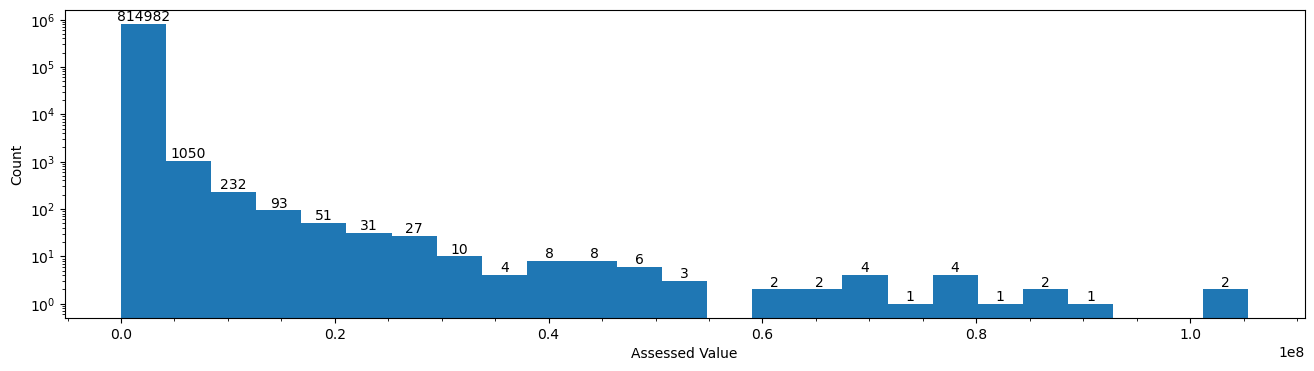

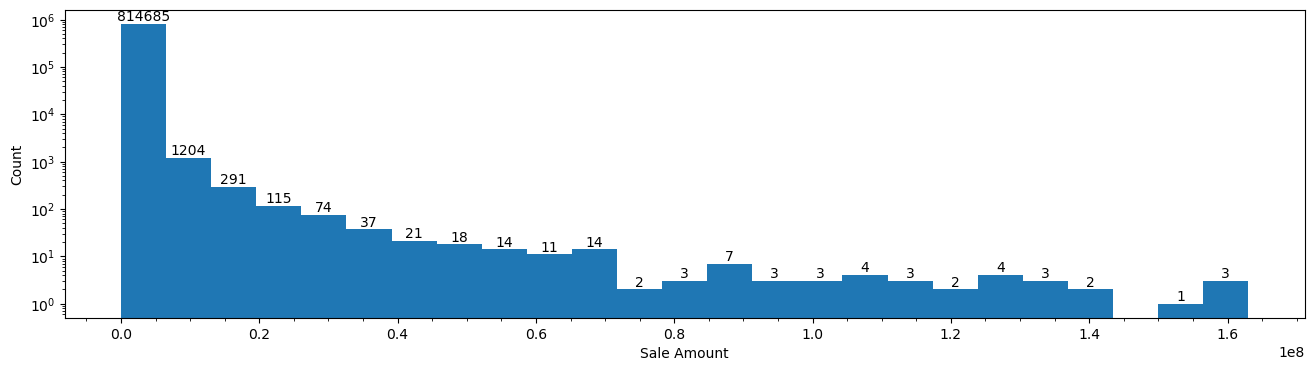

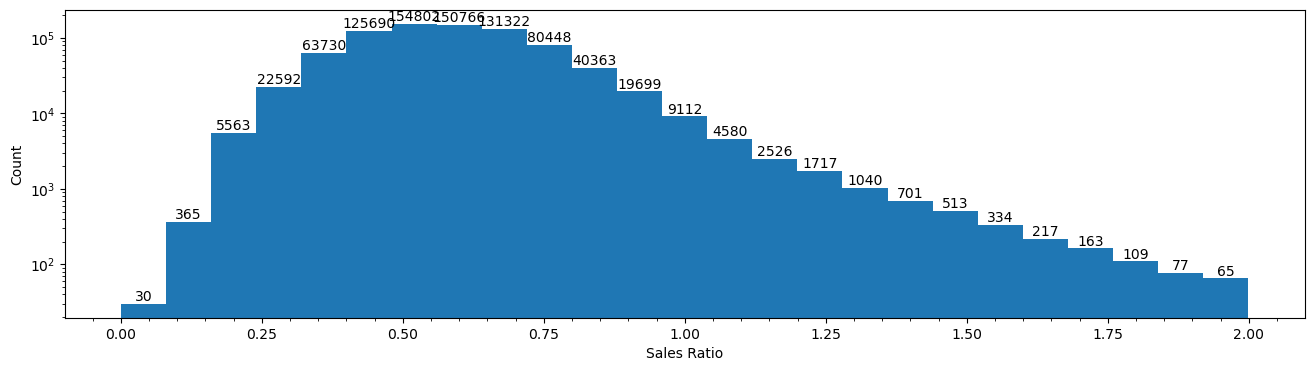

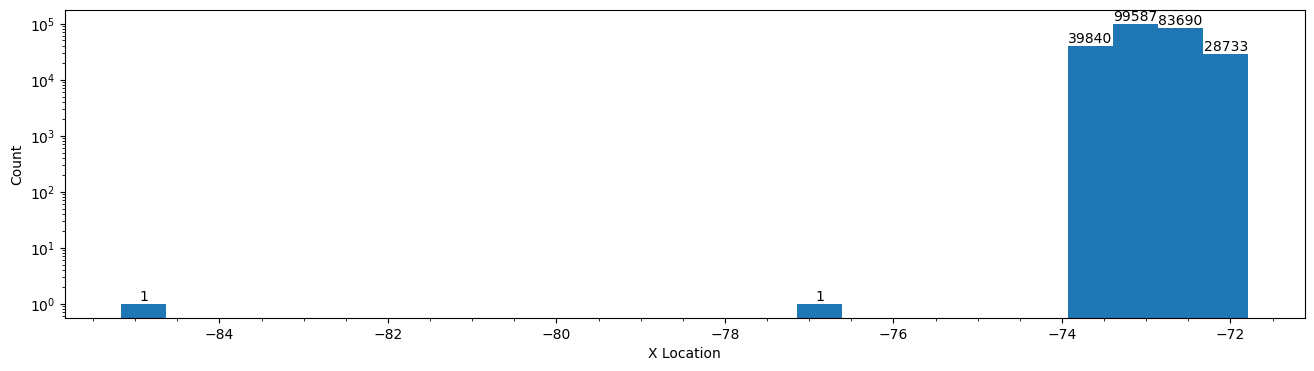

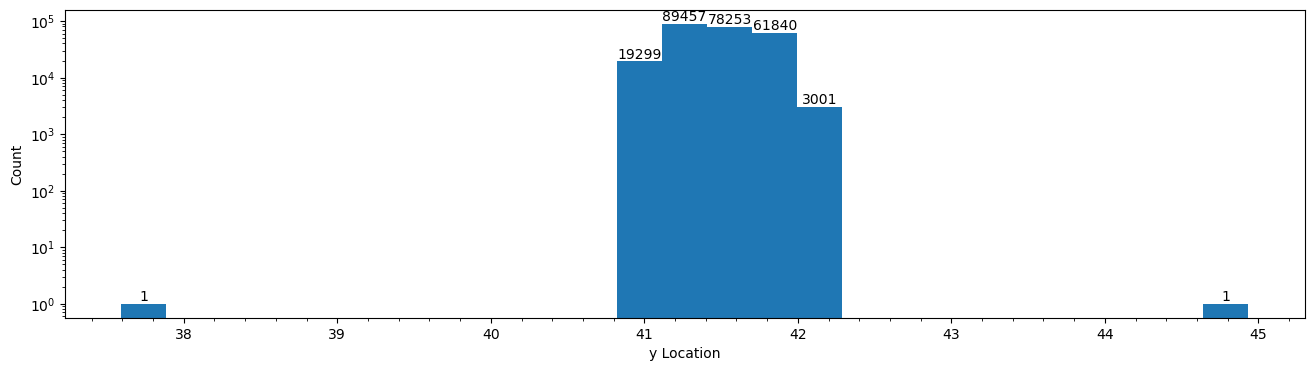

In [25]:
from matplotlib import pyplot as plt

numeric_columns = [
    'Assessed Value',
    'Sale Amount',
    'Sales Ratio',
    #'Date Recorded',
    'X Location',
    'y Location'
]

for col in numeric_columns:
    plt.figure(figsize=(16,4))
    _, _, bar = plt.hist(df[col], bins = 25)
    plt.bar_label(bar)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.yscale('log')
    plt.minorticks_on()
    plt.show()

## Categoric Data

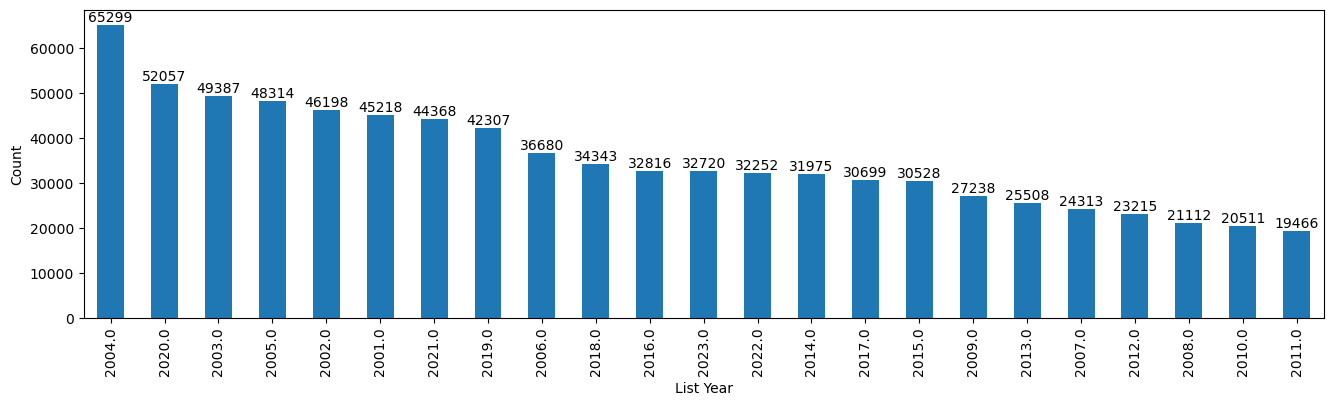

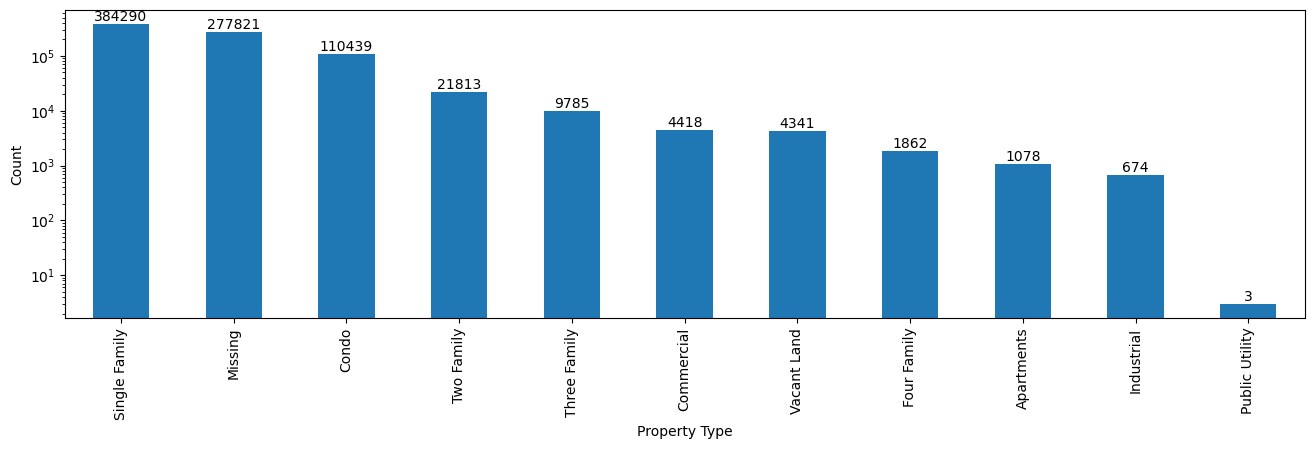

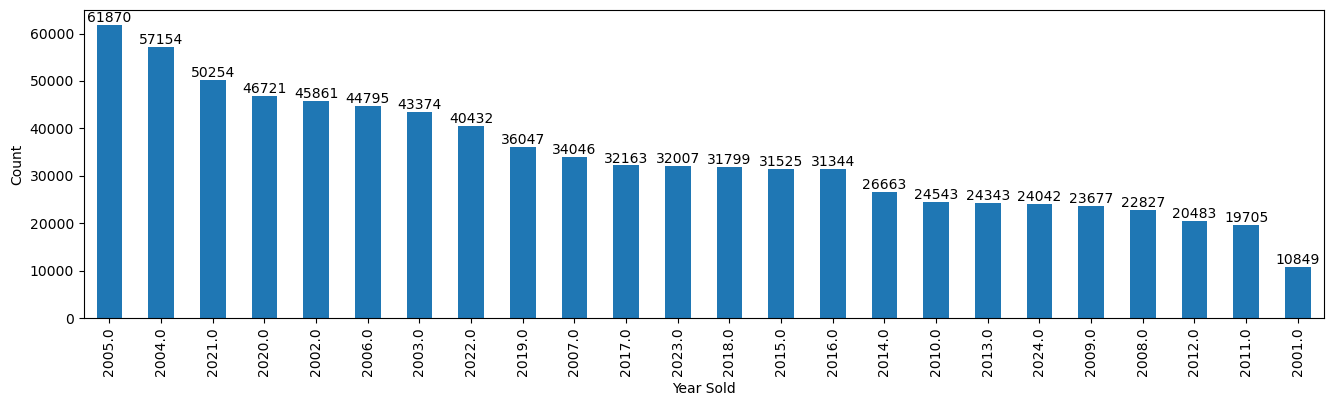

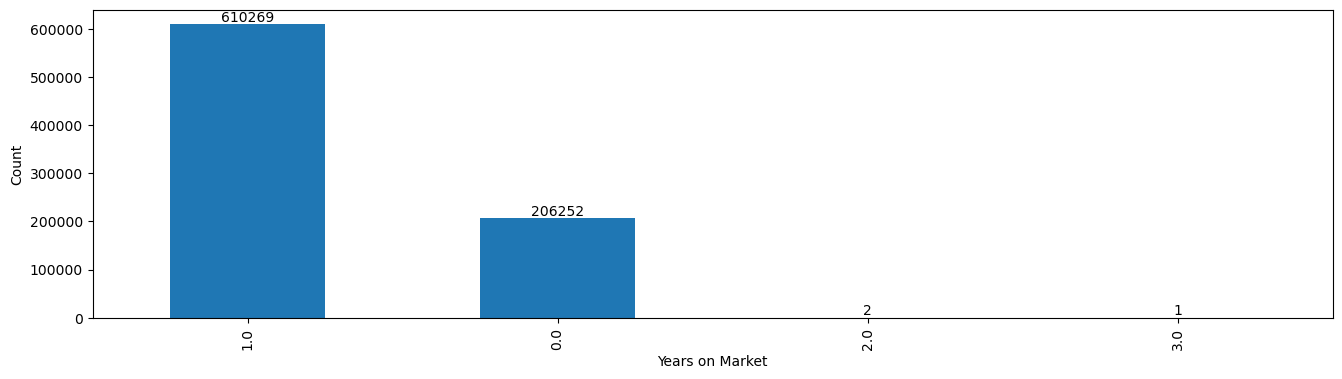

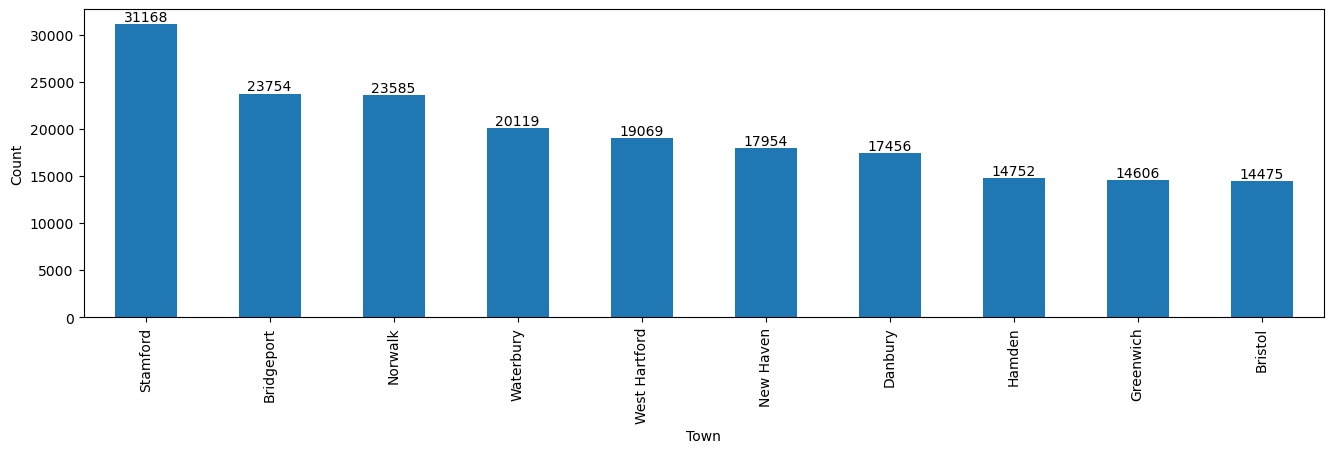

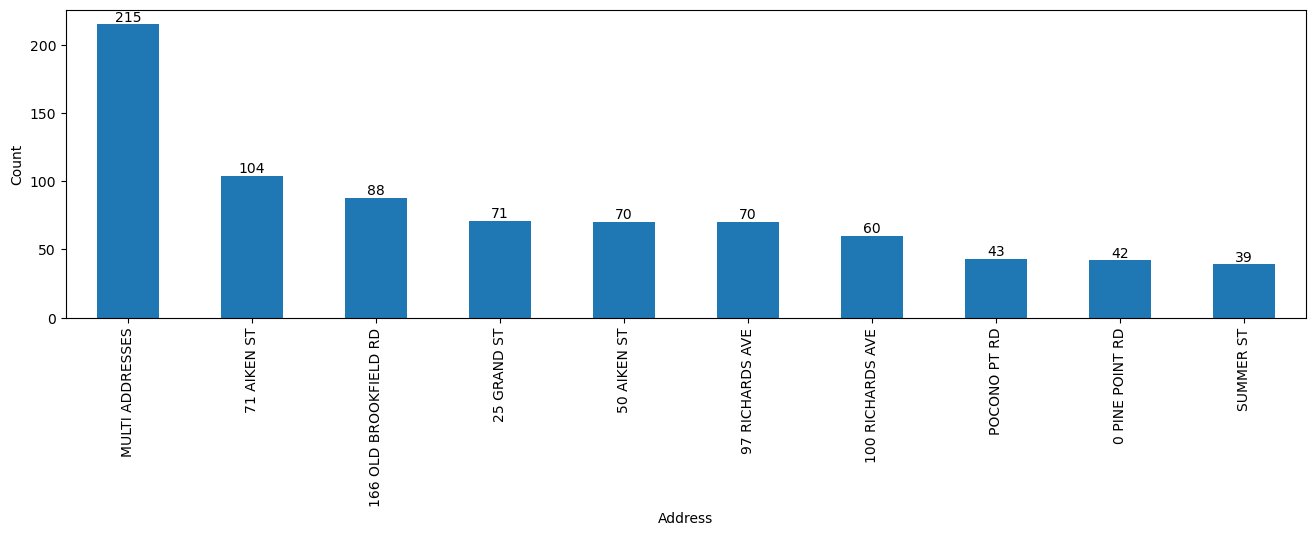

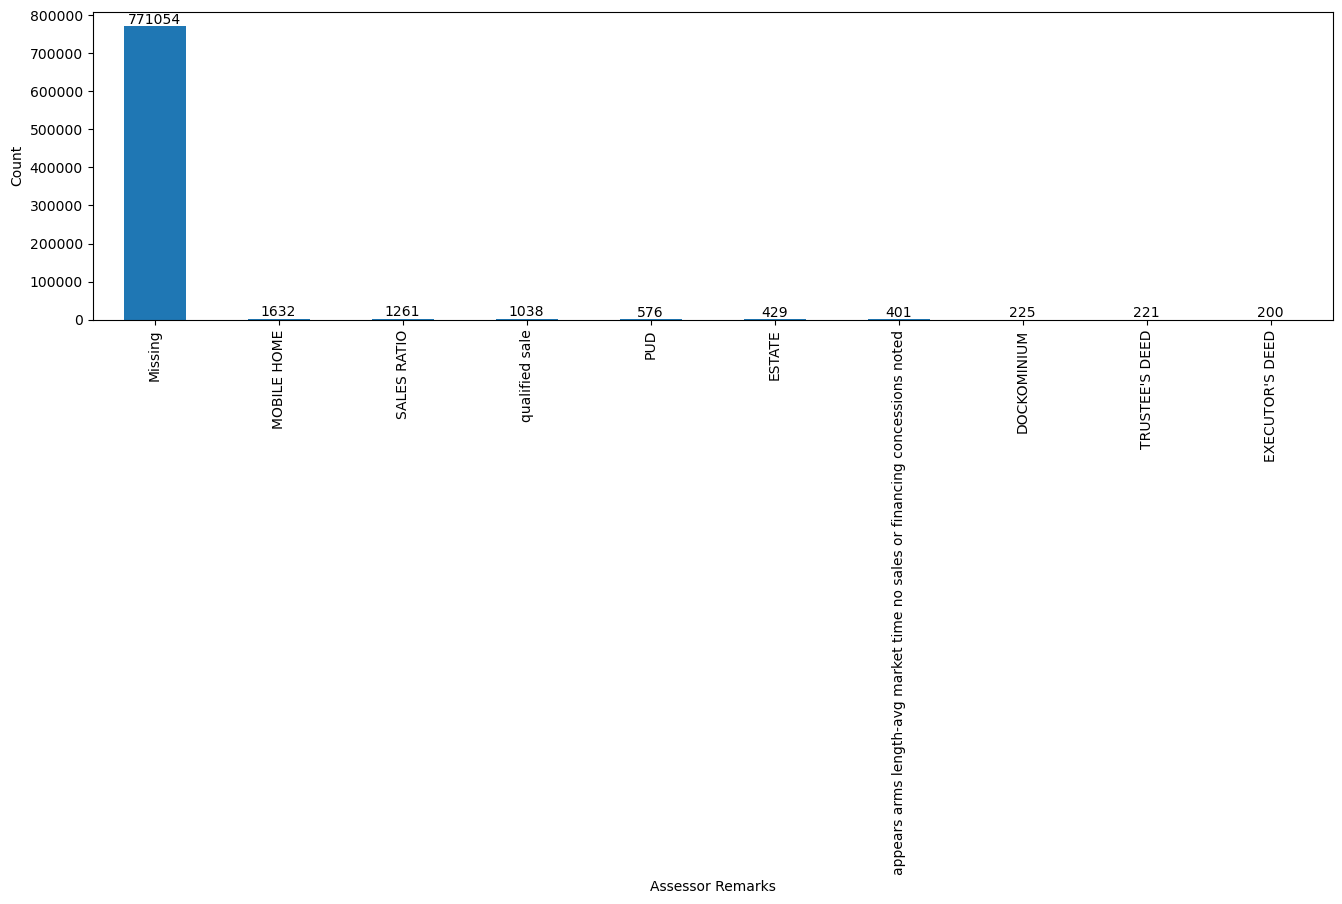

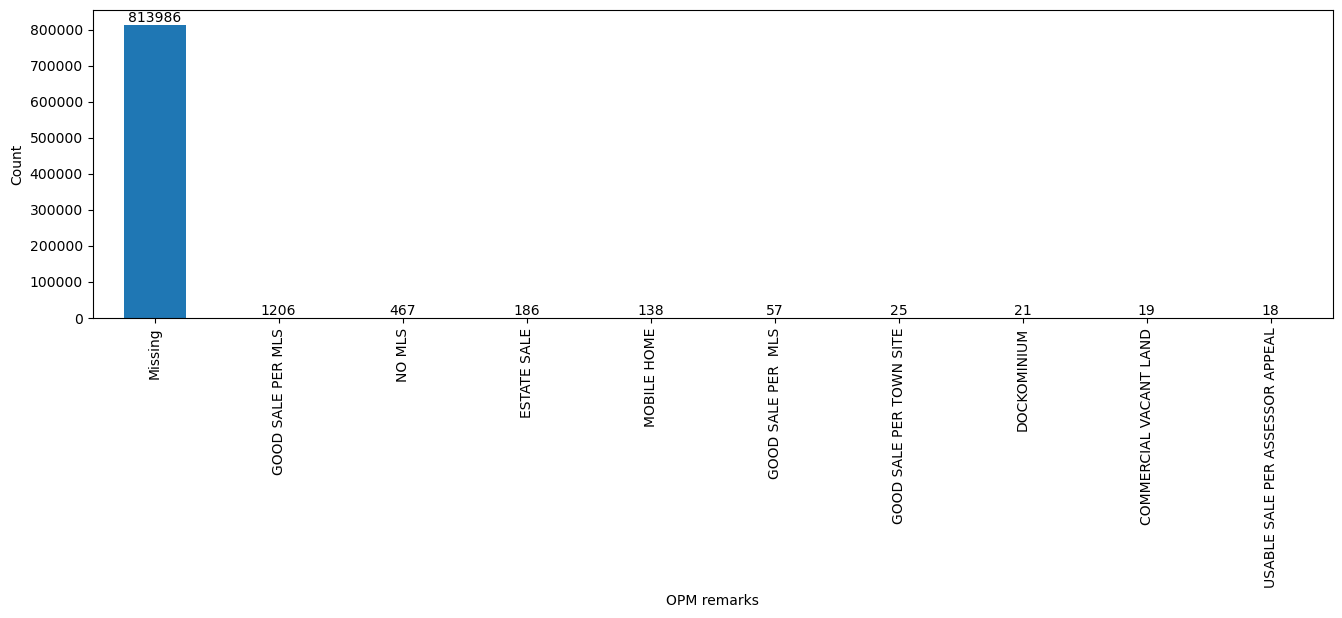

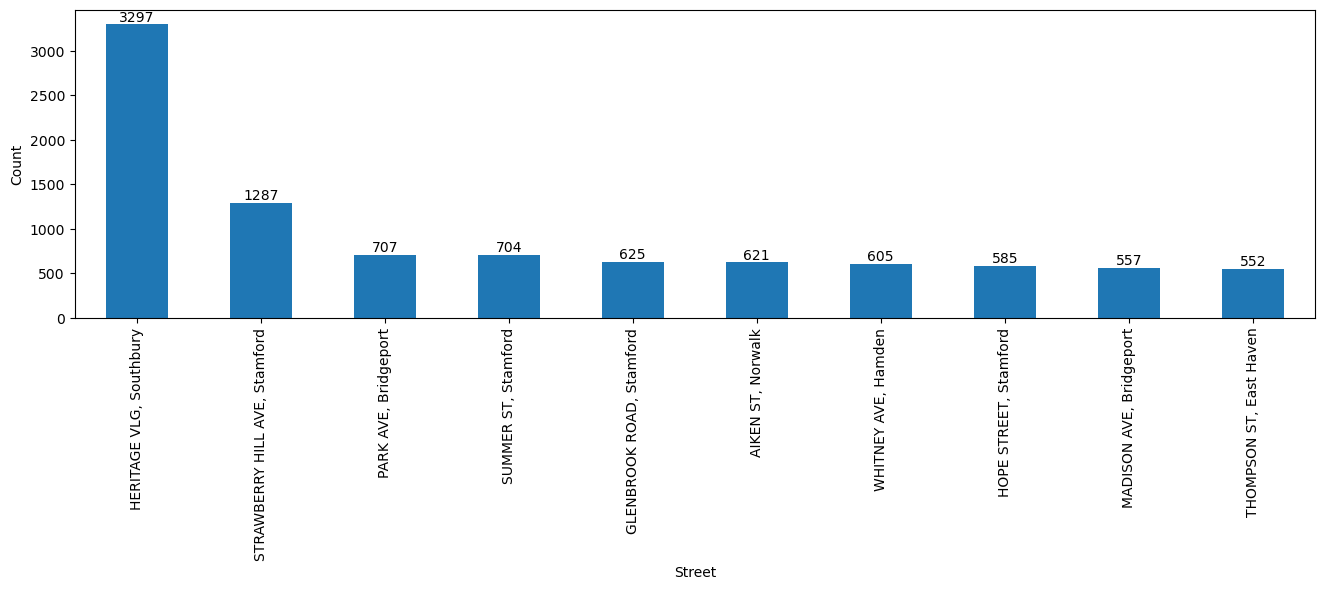

In [26]:
bar_columns = [
    'List Year',
    'Property Type',
    'Year Sold',
    'Years on Market',
]

large_bar_columns = [
    'Town',
    'Address',
    'Assessor Remarks',
    'OPM remarks',
    'Street',
]

for col in bar_columns:
    plt.figure(figsize=(16,4))
    if col == 'Property Type':
        plt.yscale('log')
    ax = df[col].value_counts().plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()

for col in large_bar_columns:
    plt.figure(figsize=(16,4))
    ax = df[col].value_counts().nlargest(10).plot(kind='bar')
    ax.bar_label(ax.containers[0])
    plt.ylabel('Count')
    plt.show()

In [27]:
df.sort_values(by = 'Sales Ratio', ascending = False).head()

Serial Number  List Year       Town                         Address  \
650217         110194     2011.0  Greenwich  318 & 320 VALLEY ROAD, COS COB   
670841          11183     2011.0  Southbury              119 A HERITAGE VLG   
694340         120024     2012.0    Hampton                        DRAIN ST   
913508         170936     2017.0  New Haven               54 BARNES AV #A-4   
993817         190196     2019.0  East Lyme           3 UPPER KENSINGTON DR   

        Assessed Value  Sale Amount  Sales Ratio Property Type  \
650217        899640.0     450000.0     1.999200       Missing   
670841        139780.0      70000.0     1.996857         Condo   
694340         66840.0      33500.0     1.995224       Missing   
913508         23940.0      12000.0     1.995000         Condo   
993817        105560.0      53000.0     1.991700       Missing   

                                         Assessor Remarks OPM remarks  \
650217  08-1555/s & 08a-1981/s unable to find reason t...     Missing   
670841                                            Missing     Missing   
694340                                  4-10 / 23 / 19C-3     Missing   
913508                                       BELOW MARKET      NO MLS   
993817                                            Missing     Missing   

                                 Street  X Location  y Location  \
650217  VALLEY ROAD, COS COB, Greenwich         NaN         NaN   
670841          HERITAGE VLG, Southbury   -73.22516    41.48985   
694340                DRAIN ST, Hampton         NaN         NaN   
913508             BARNES AV, New Haven   -72.87888    41.32575   
993817   UPPER KENSINGTON DR, East Lyme         NaN         NaN   

        sin(Day of Week Sold)  cos(Day of Week Sold)  sin(Day of Year Sold)  \
650217               0.433884              -0.900969               0.432776   
670841              -0.433884              -0.900969               0.587785   
694340               0.433884              -0.900969              -0.845249   
913508               0.974928              -0.222521              -0.903356   
993817               0.974928              -0.222521               0.991114   

        cos(Day of Year Sold)  Year Sold  Years on Market  
650217               0.901502     2012.0              1.0  
670841              -0.809017     2012.0              1.0  
694340              -0.534373     2013.0              1.0  
913508              -0.428892     2018.0              1.0  
993817              -0.133015     2020.0              1.0

## Average Sale Amounts

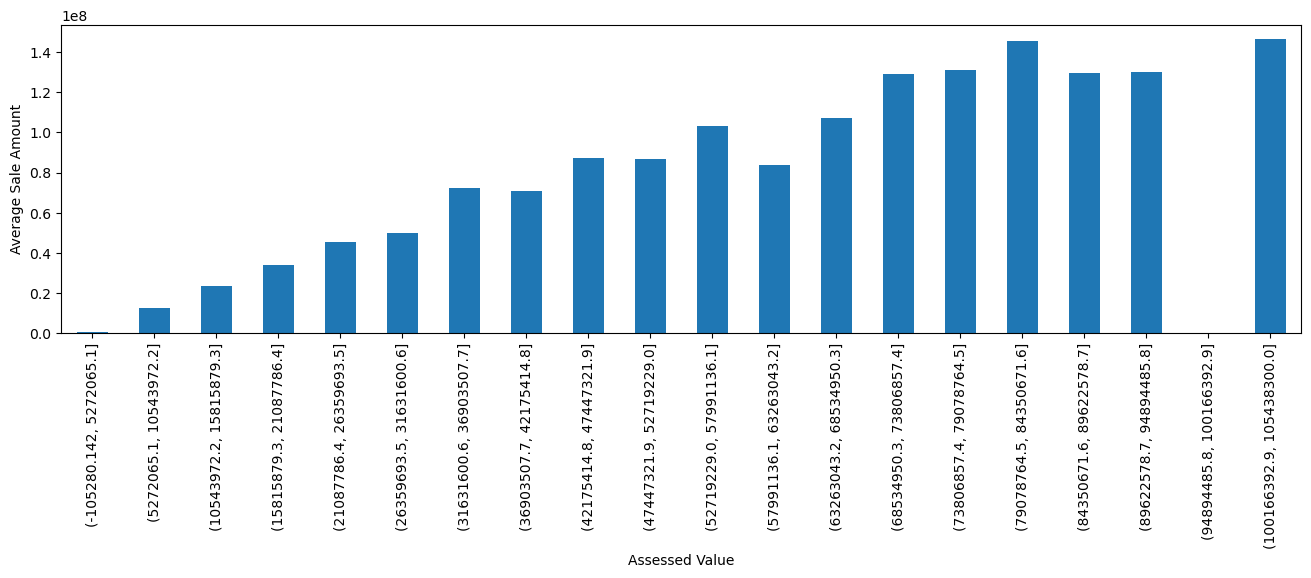

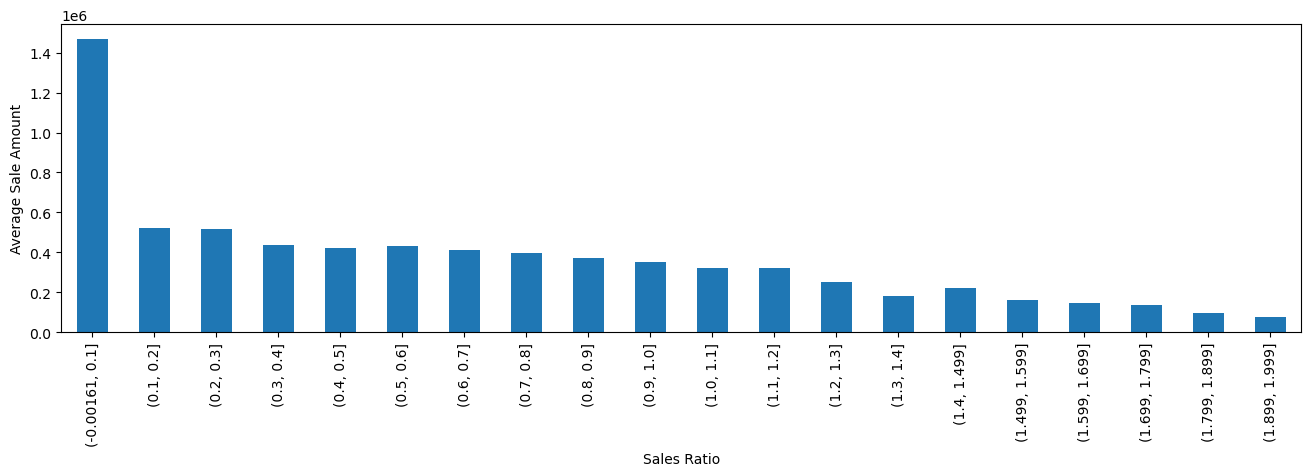

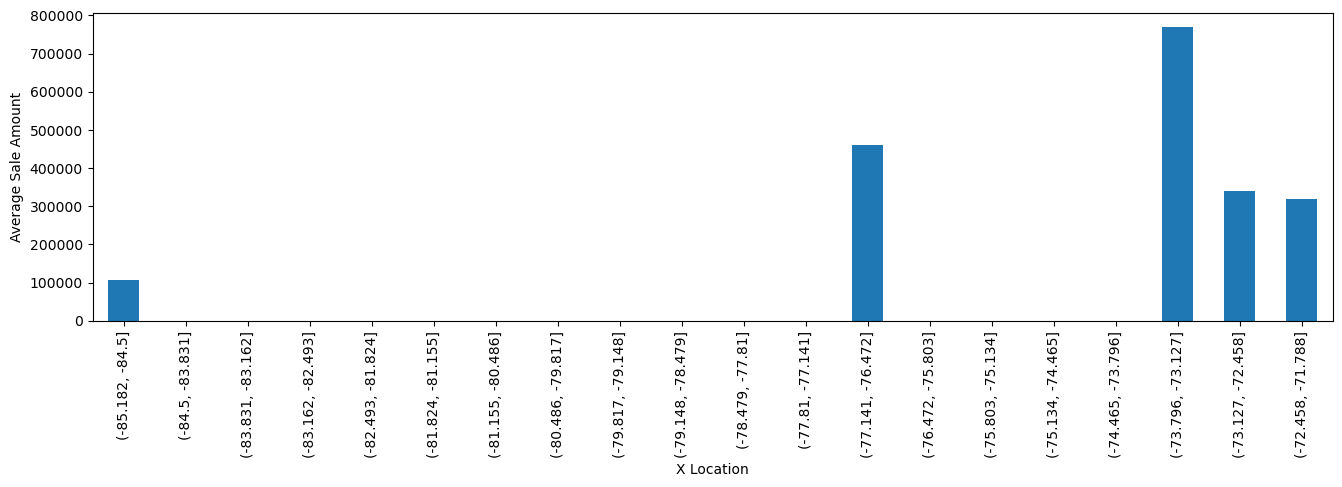

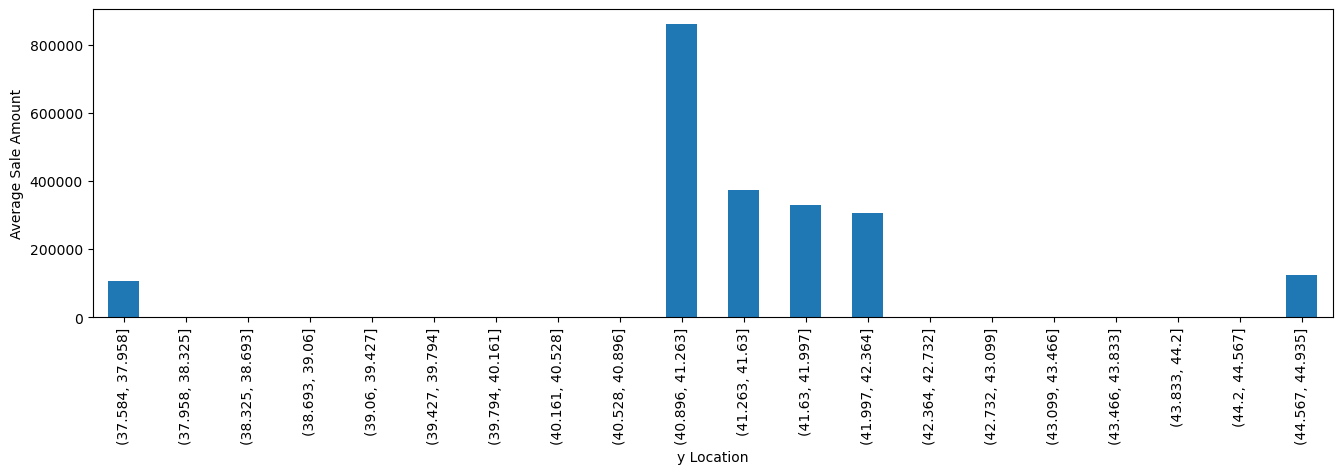

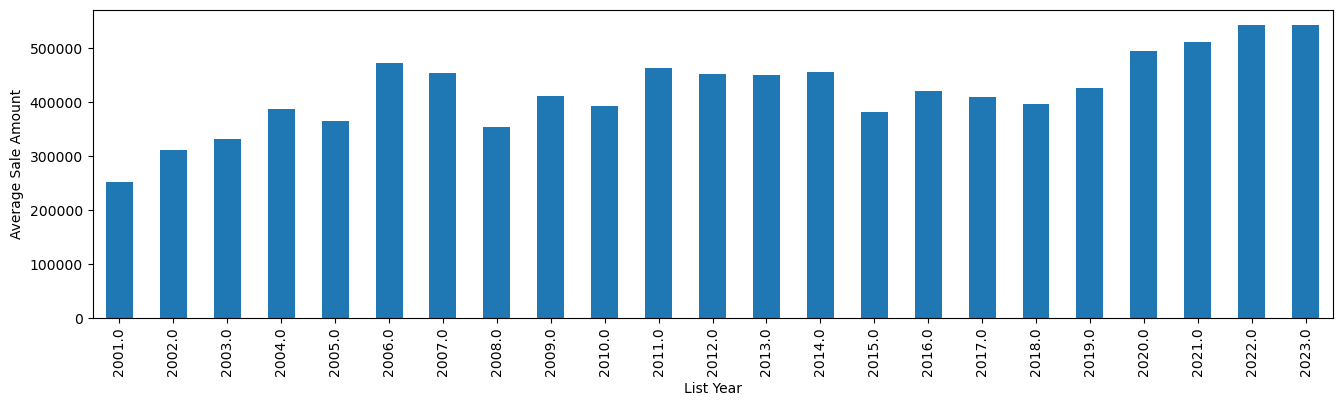

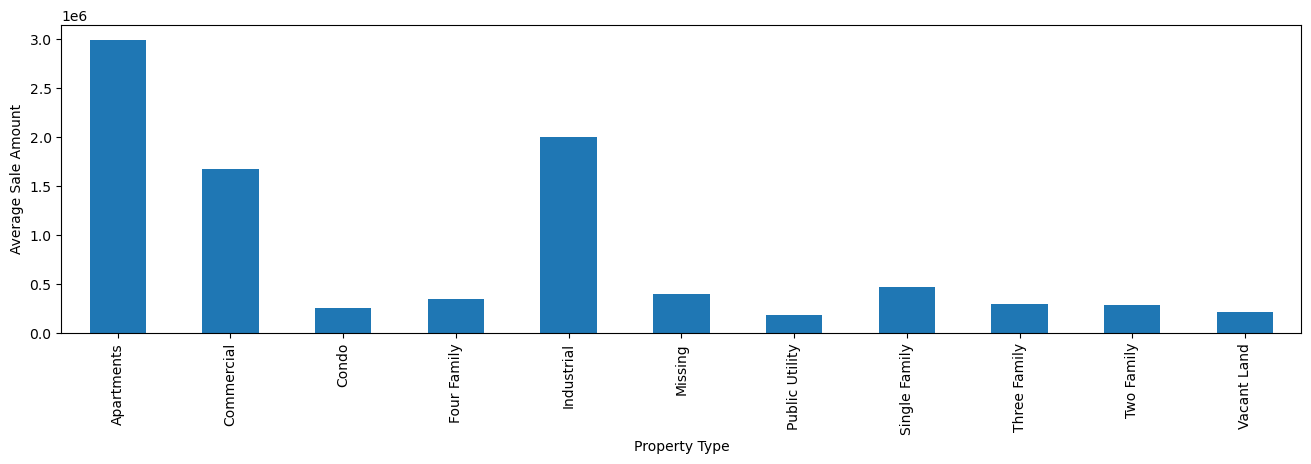

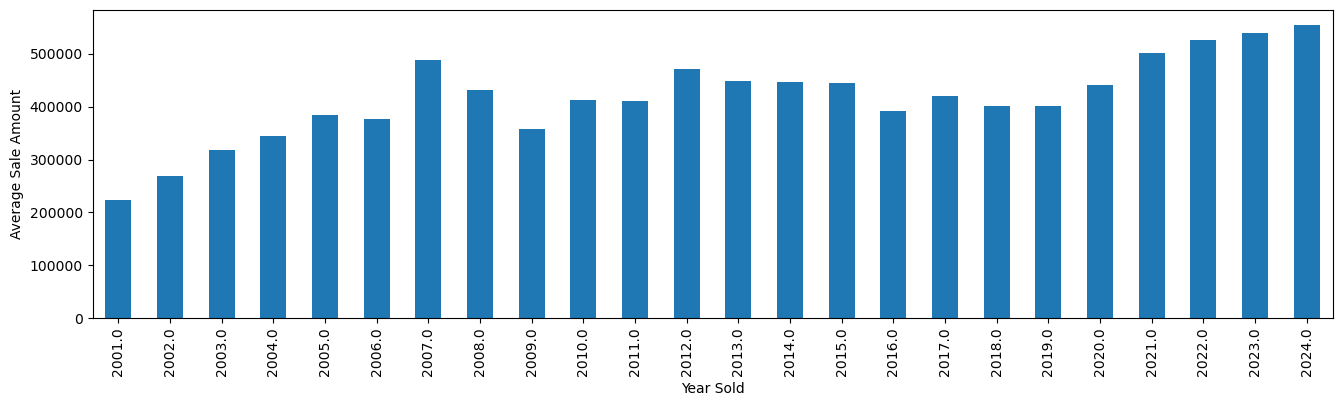

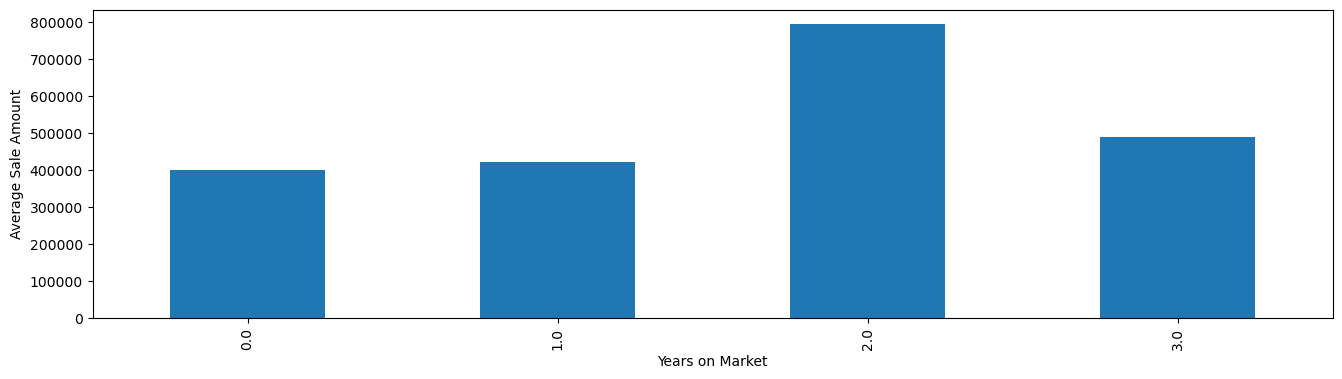

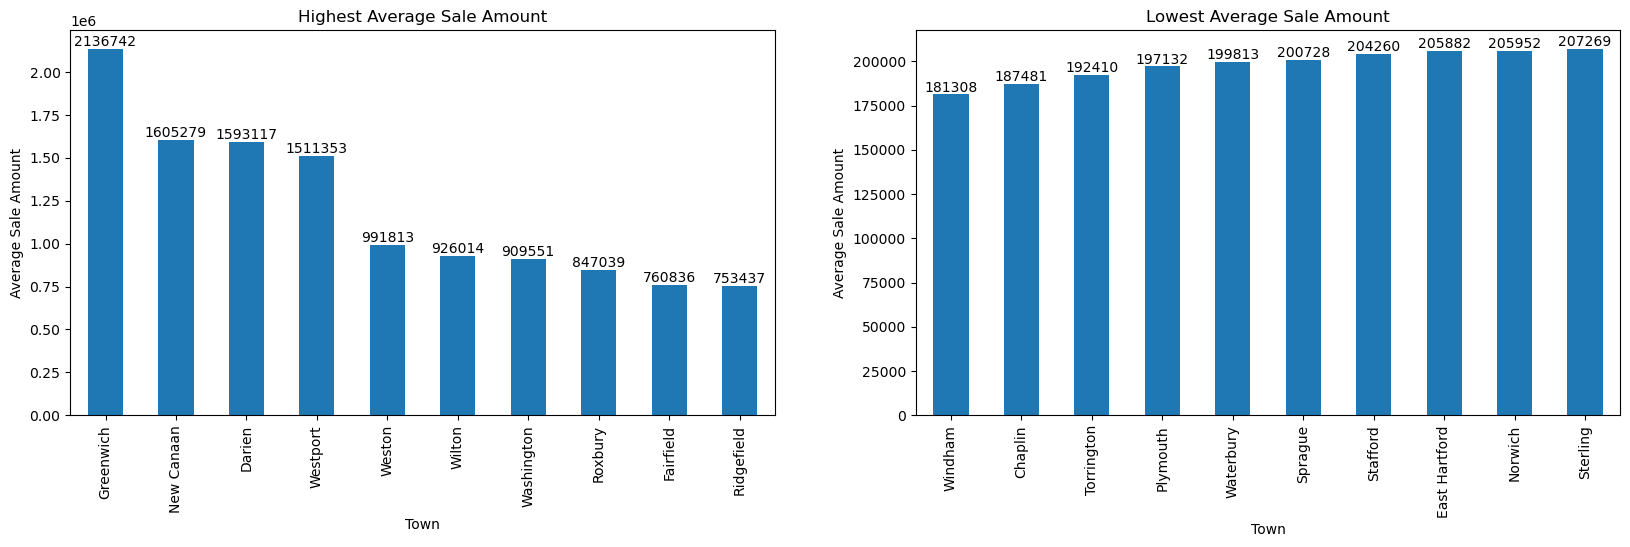

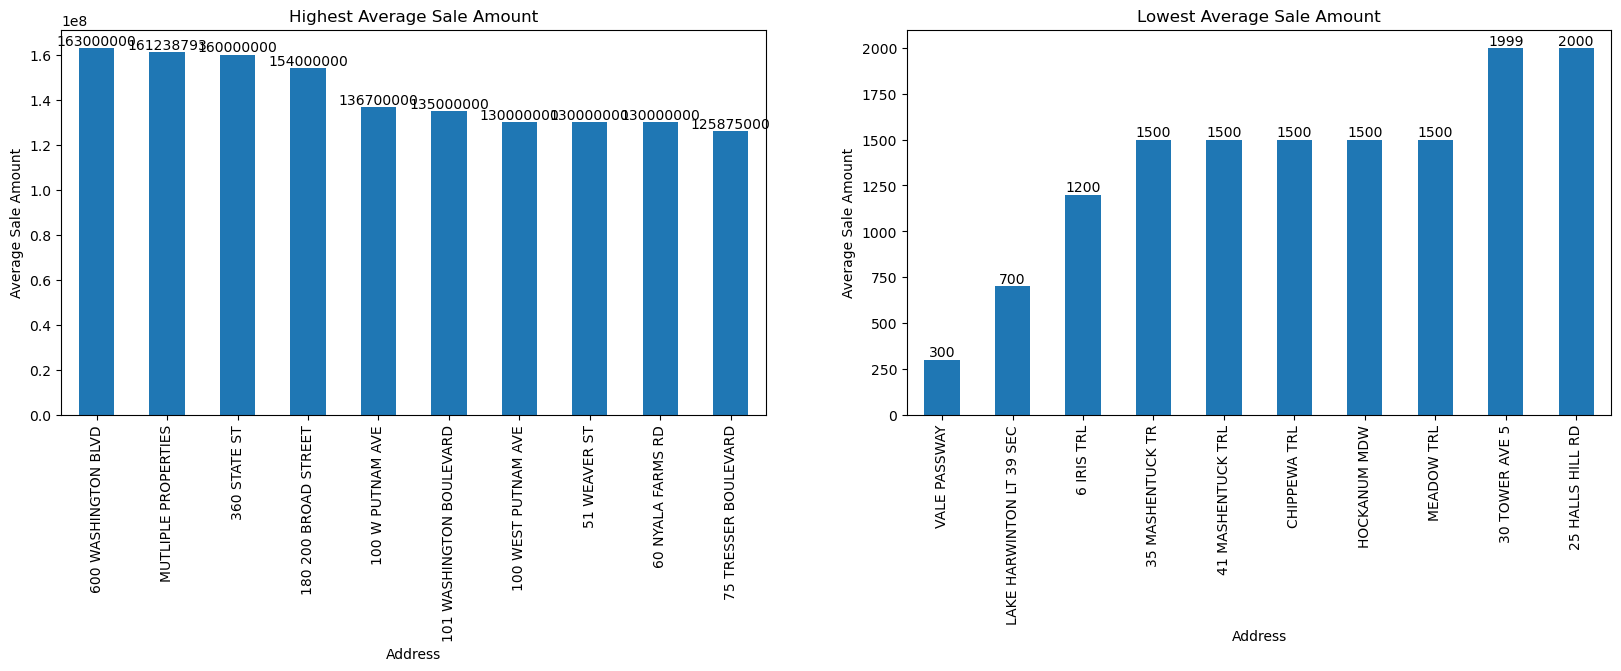

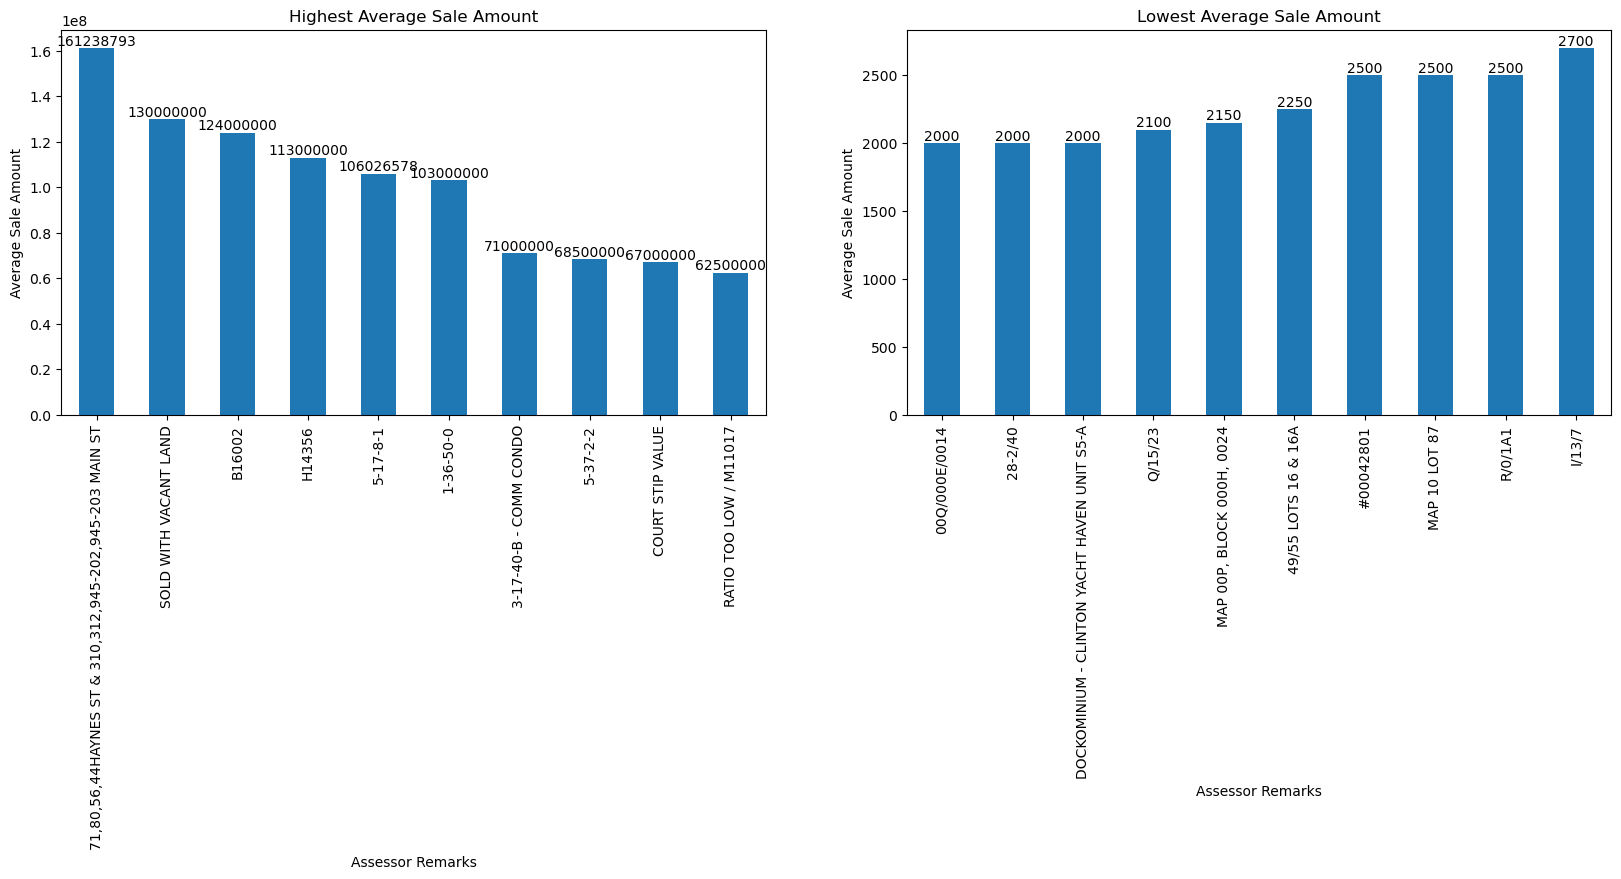

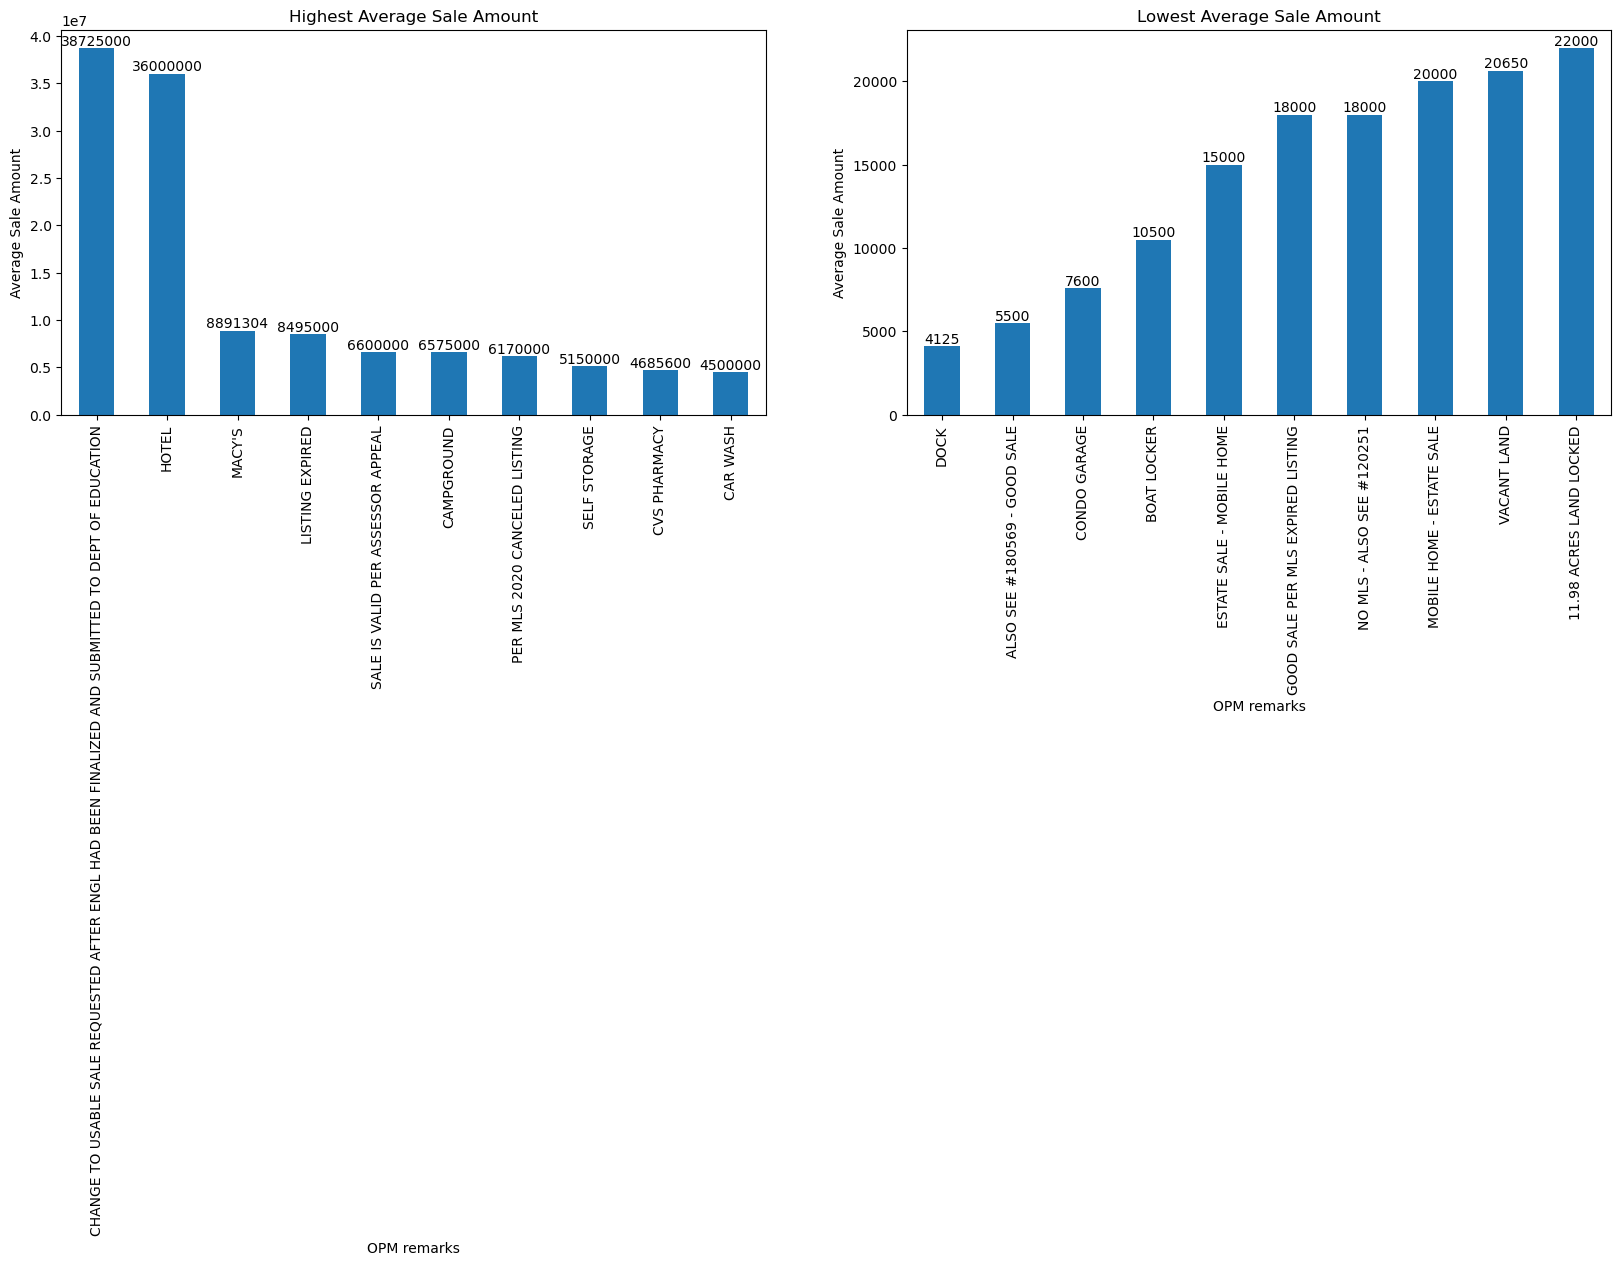

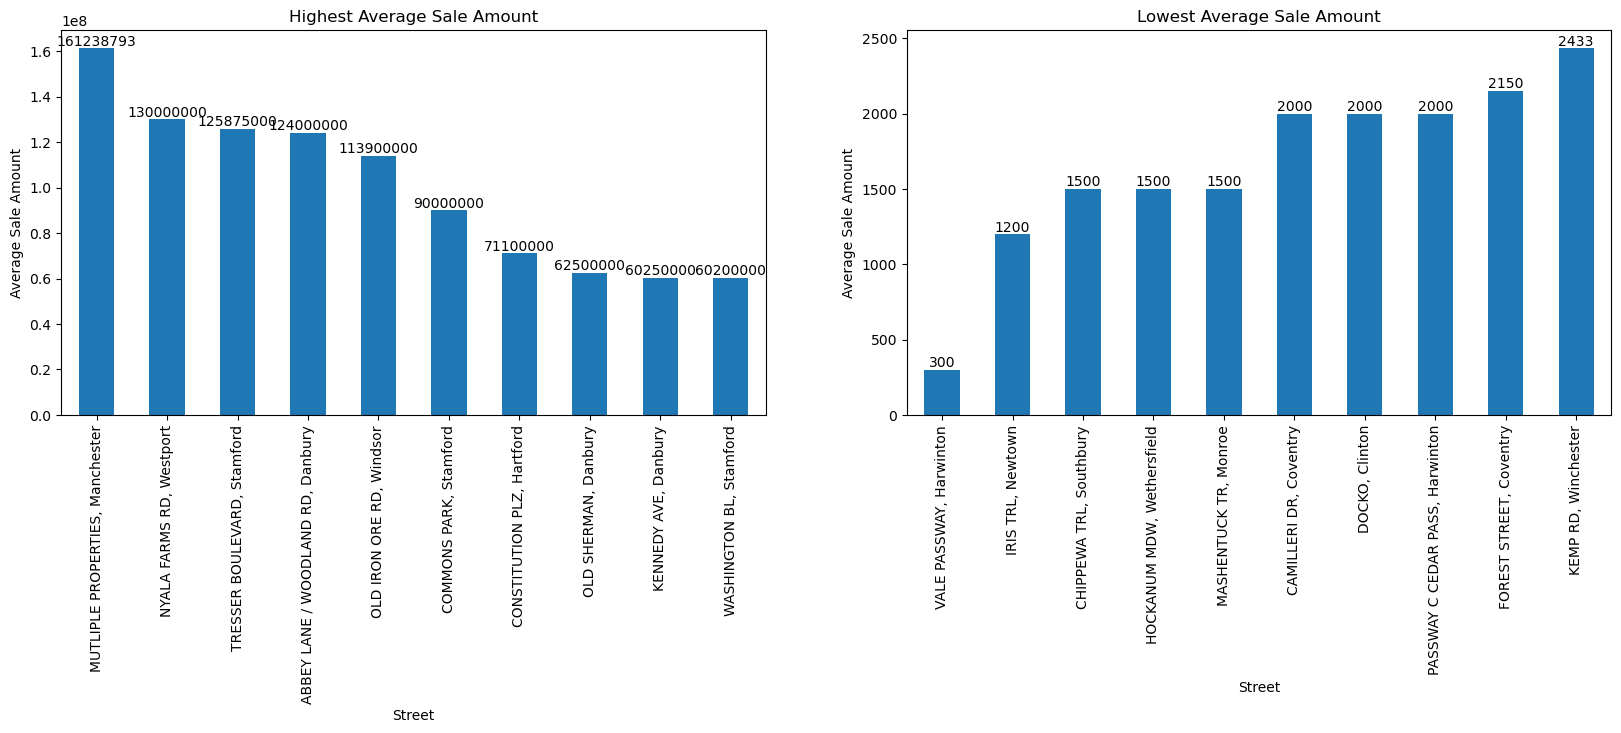

In [28]:
results = numeric_columns[1]

for col in numeric_columns:
    if col == results:
        continue
        
    plt.figure(figsize=(16,4))
    df.groupby(pd.cut(df[col],bins = 20),observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in bar_columns:
    
    plt.figure(figsize=(16,4))
    ax = df.groupby(col,observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()
    
for col in large_bar_columns:
    
    fix, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
    df.groupby(col,observed=False)[results].mean().nlargest(10).plot(kind='bar',ax=ax1)
    df.groupby(col,observed=False)[results].mean().nsmallest(10).plot(kind='bar',ax=ax2)

    ax1.set_title(f'Highest Average {results}')
    ax1.bar_label(ax1.containers[0],fmt='%.0f')
    ax1.set_ylabel(f'Average {results}')
        
    ax2.set_title(f'Lowest Average {results}')
    ax2.bar_label(ax2.containers[0],fmt='%.0f')
    ax2.set_ylabel(f'Average {results}')    
    
    plt.show()

## Average Assessed Value

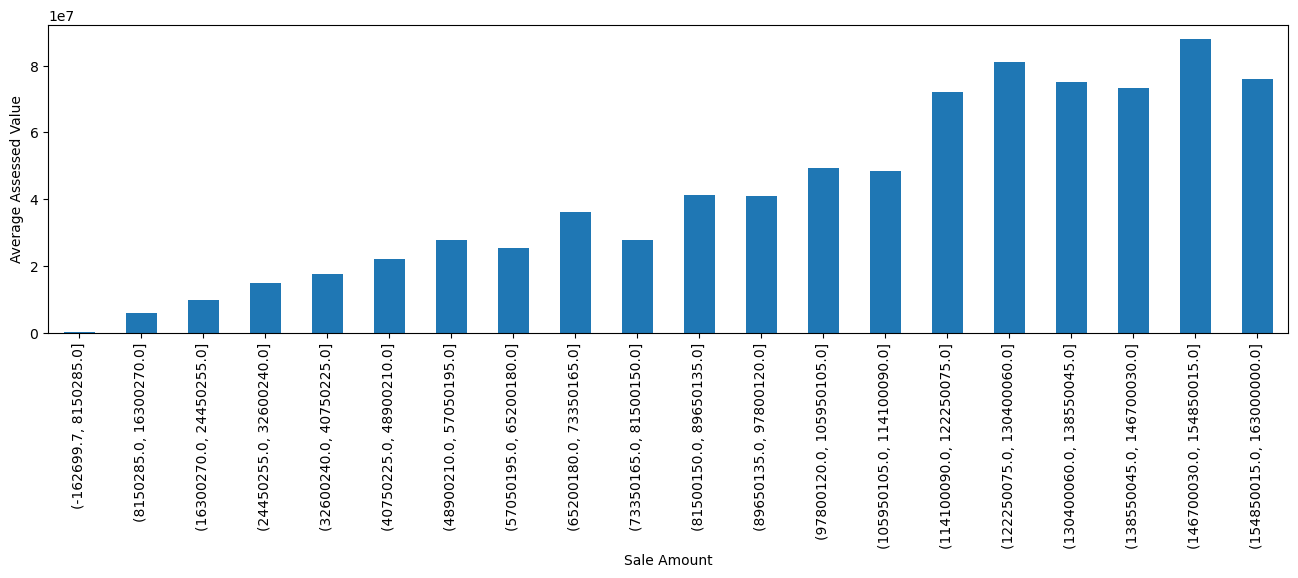

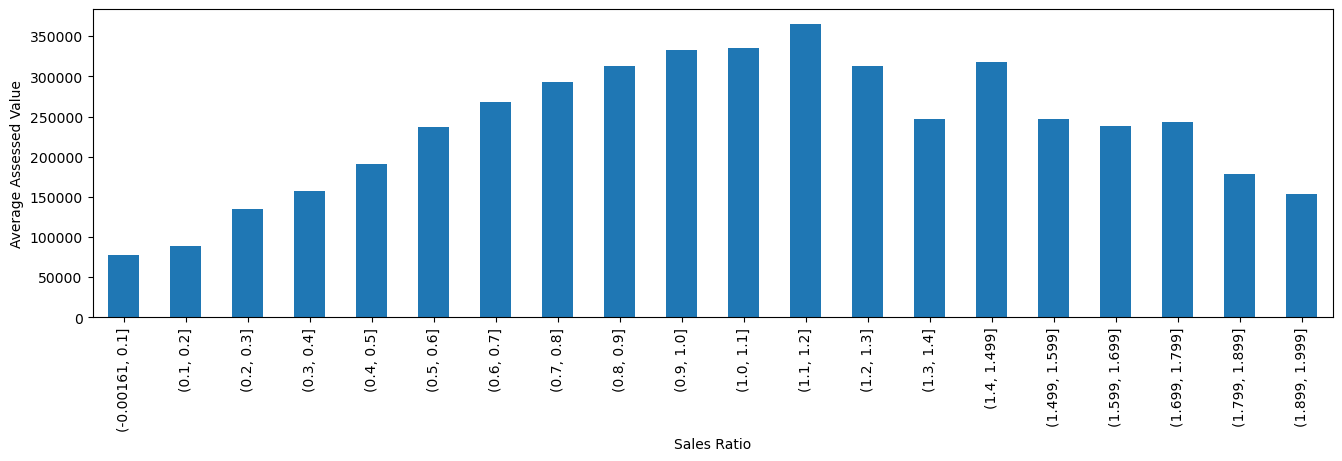

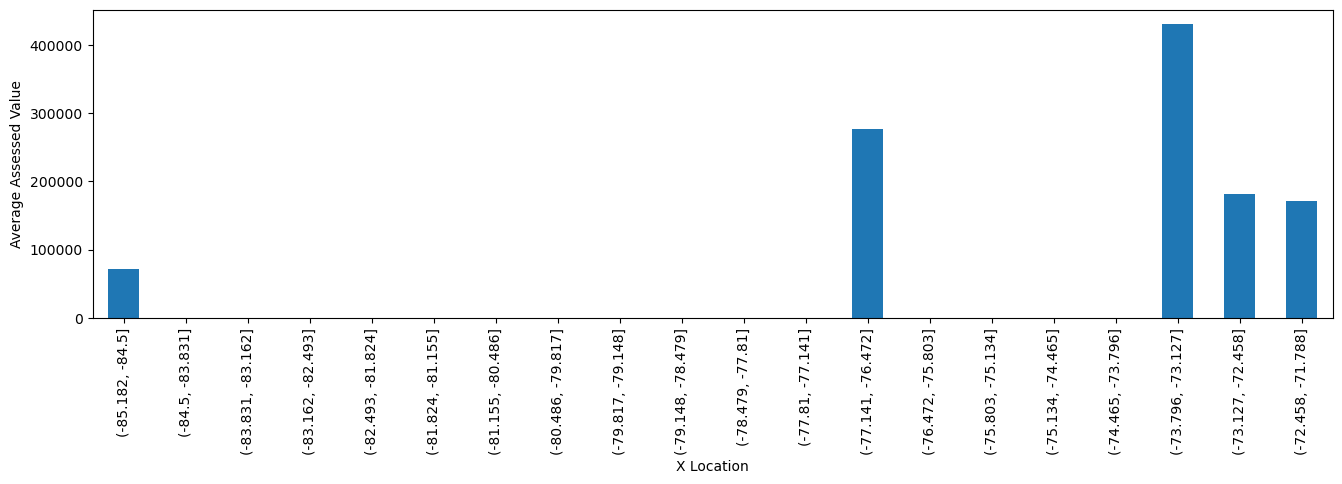

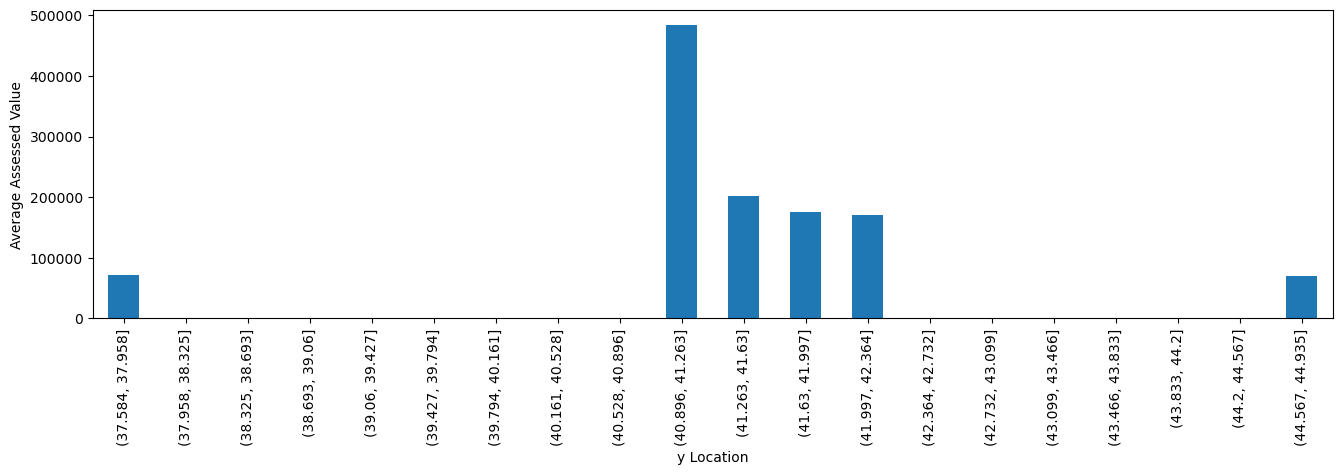

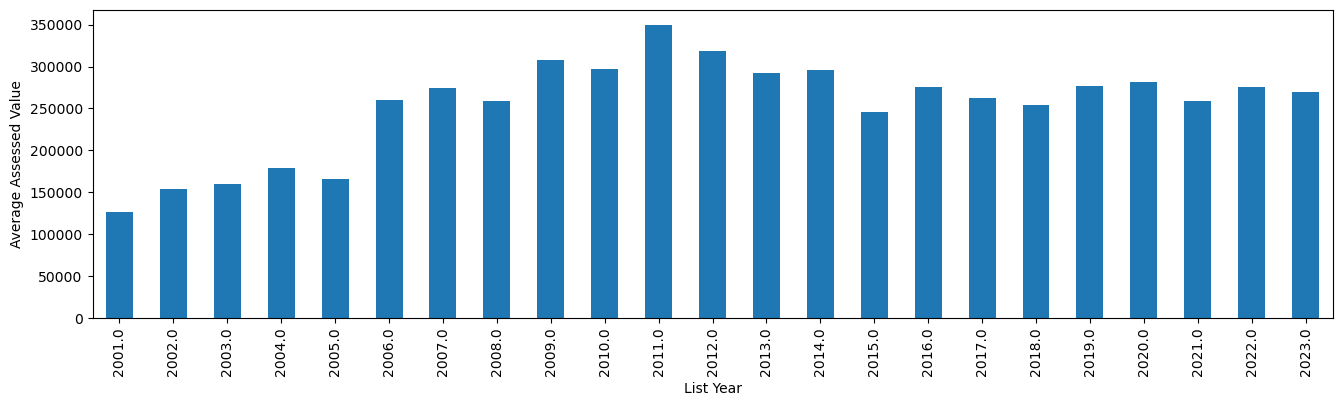

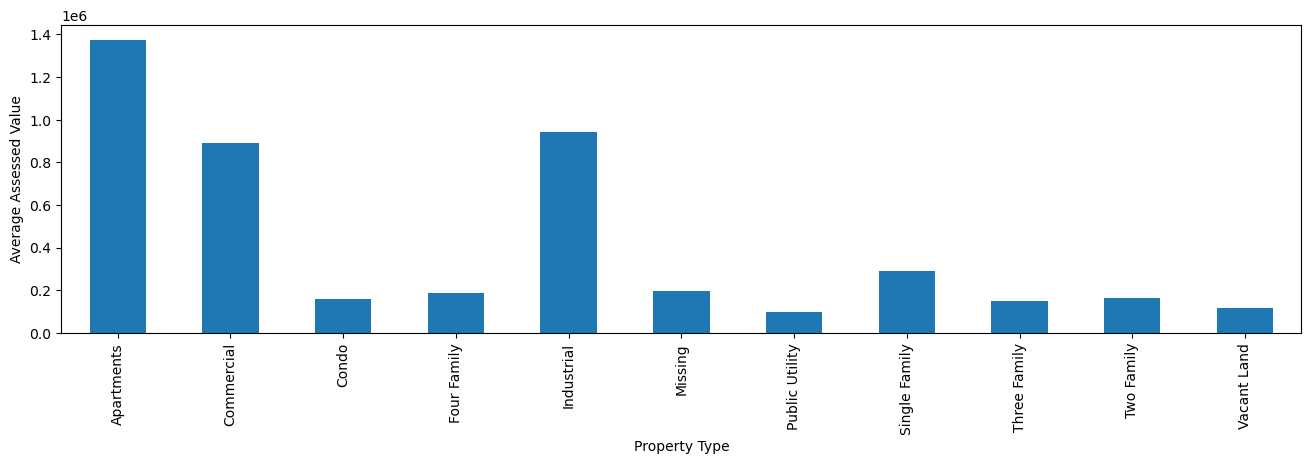

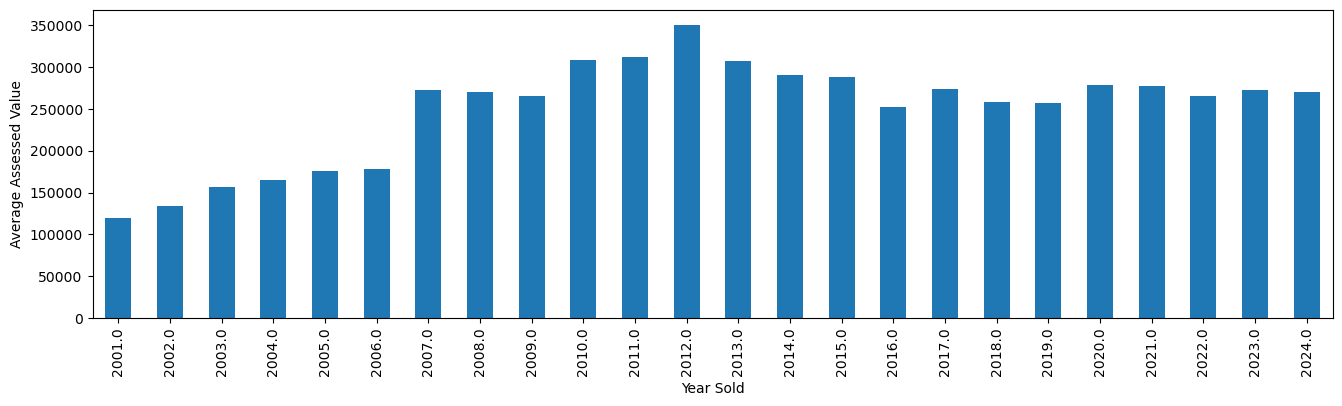

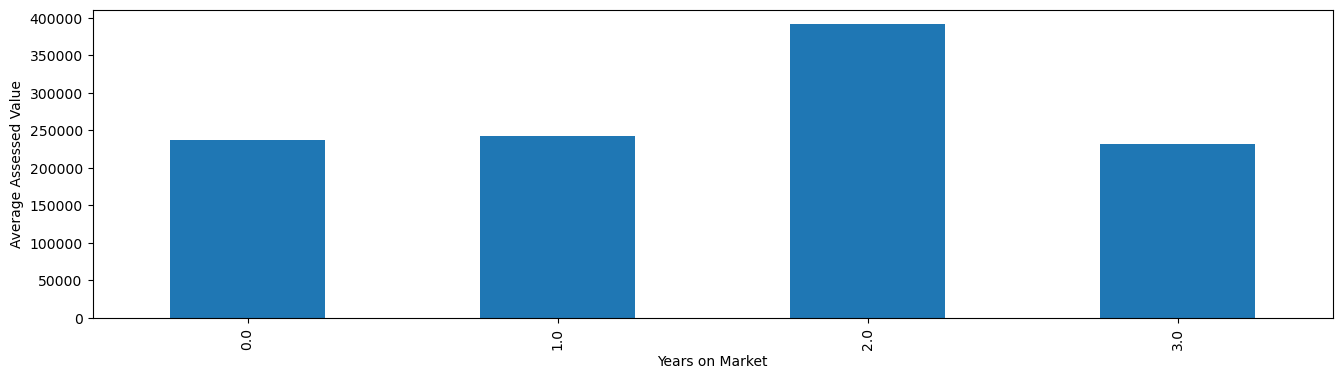

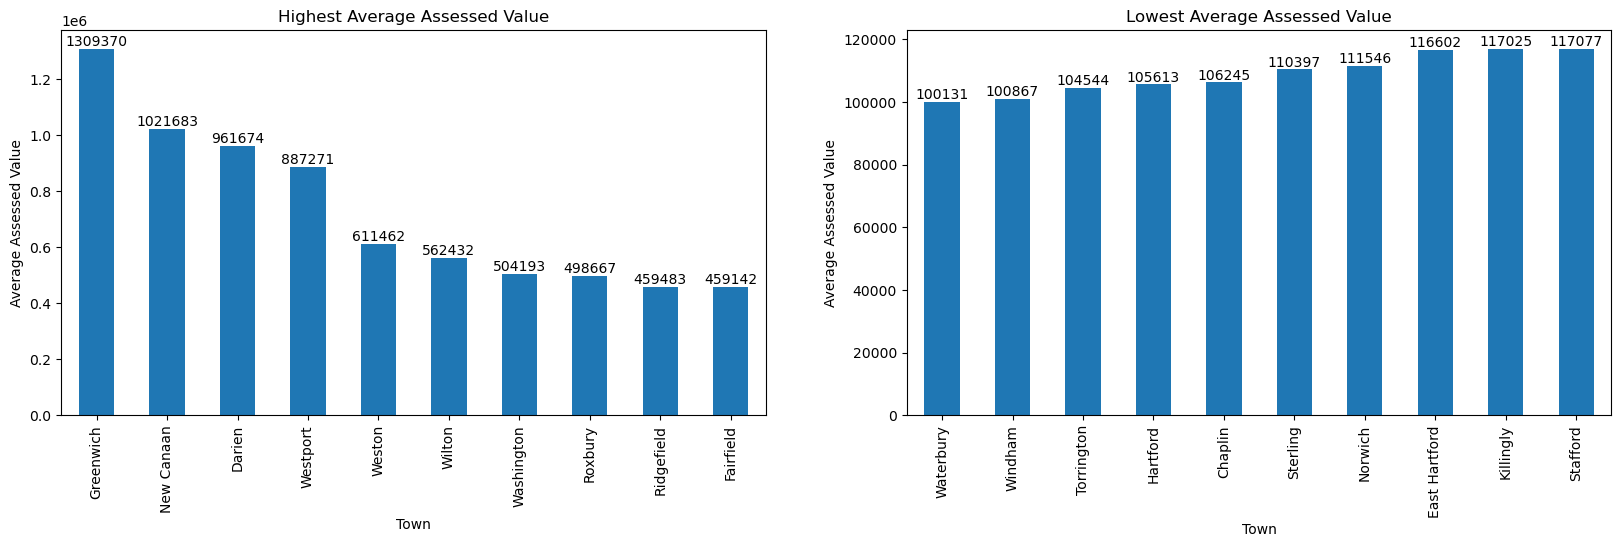

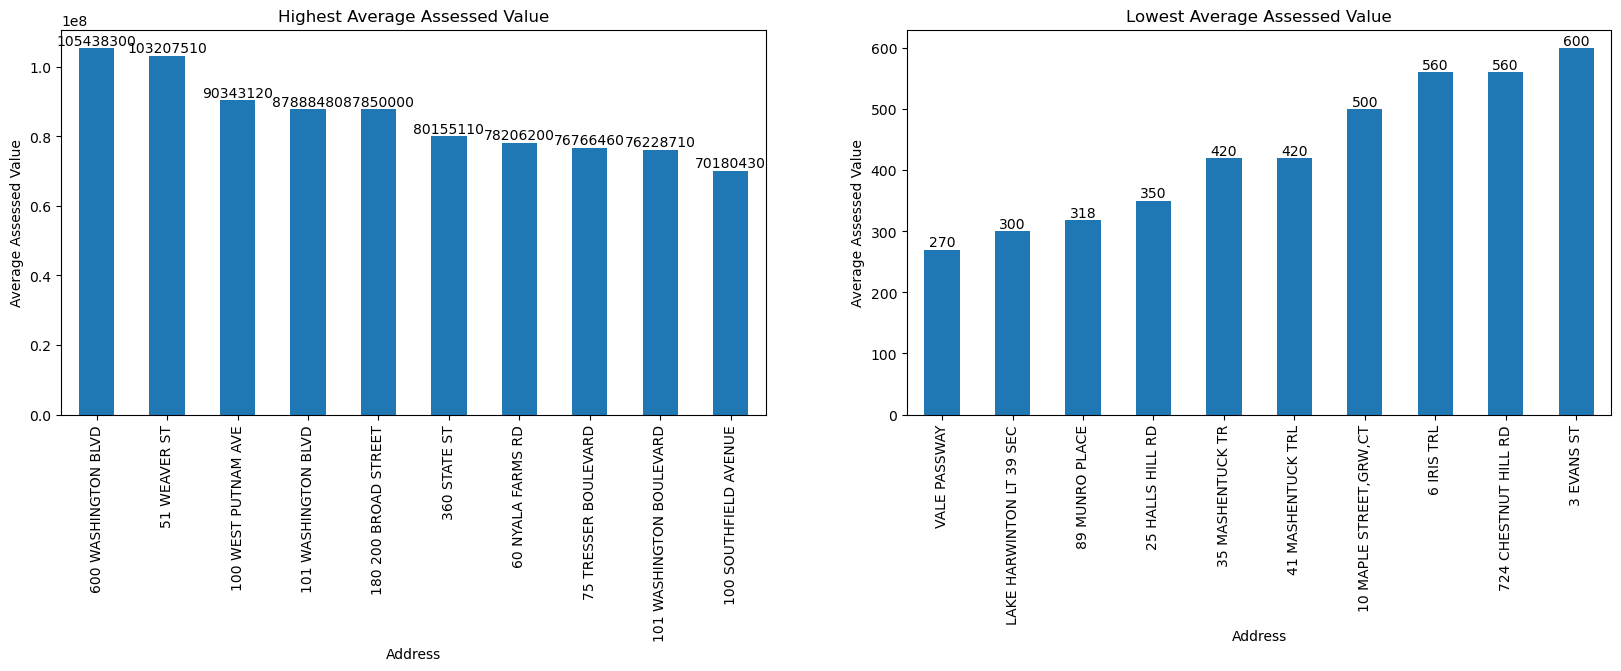

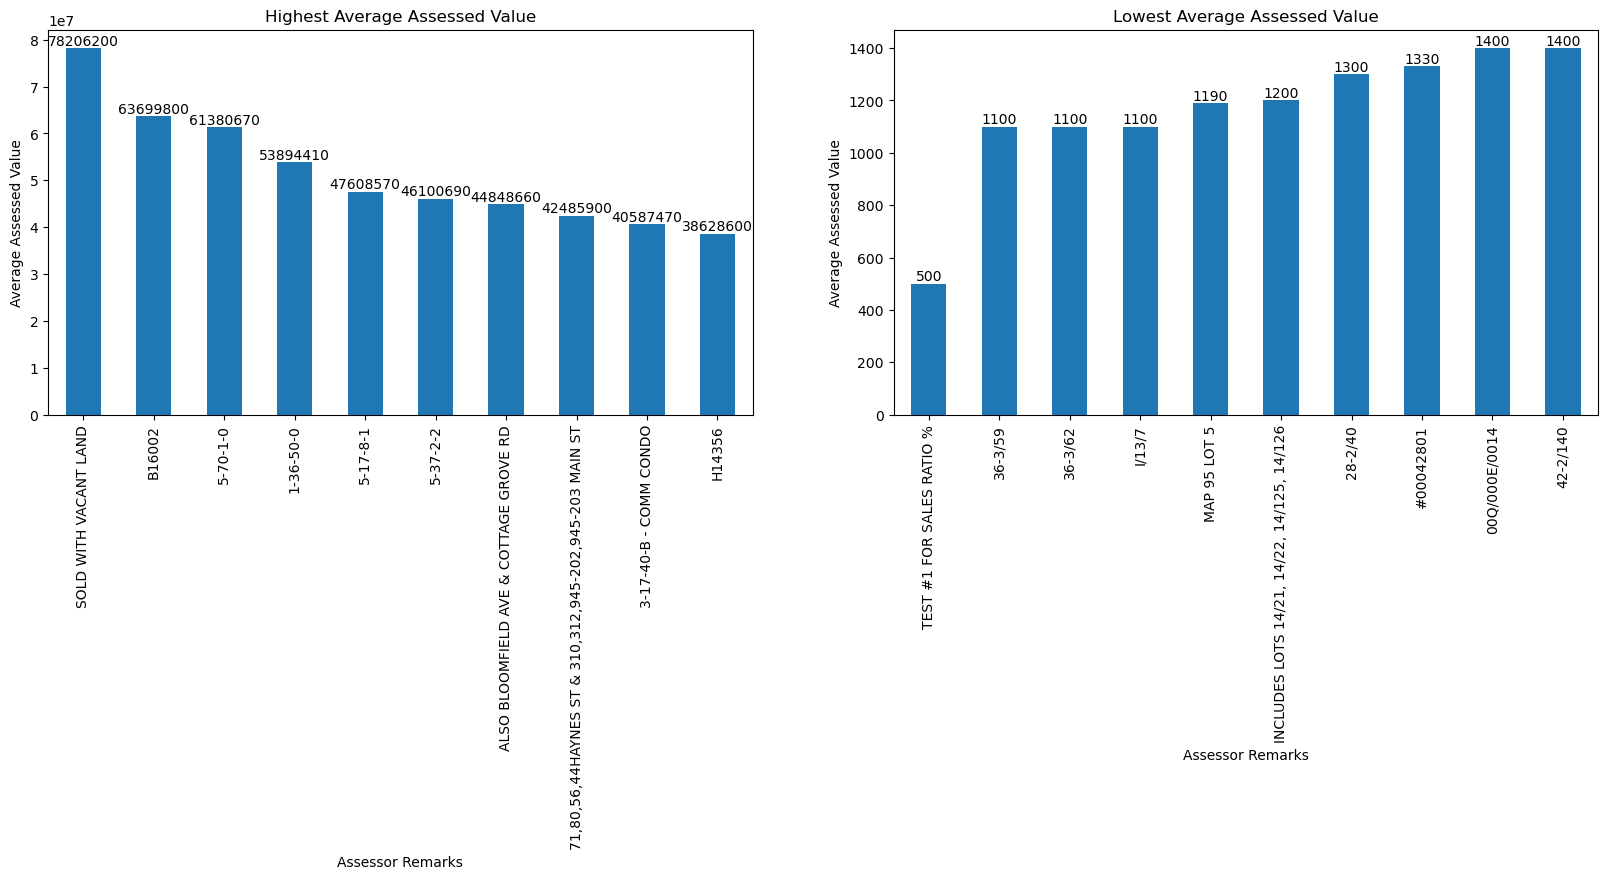

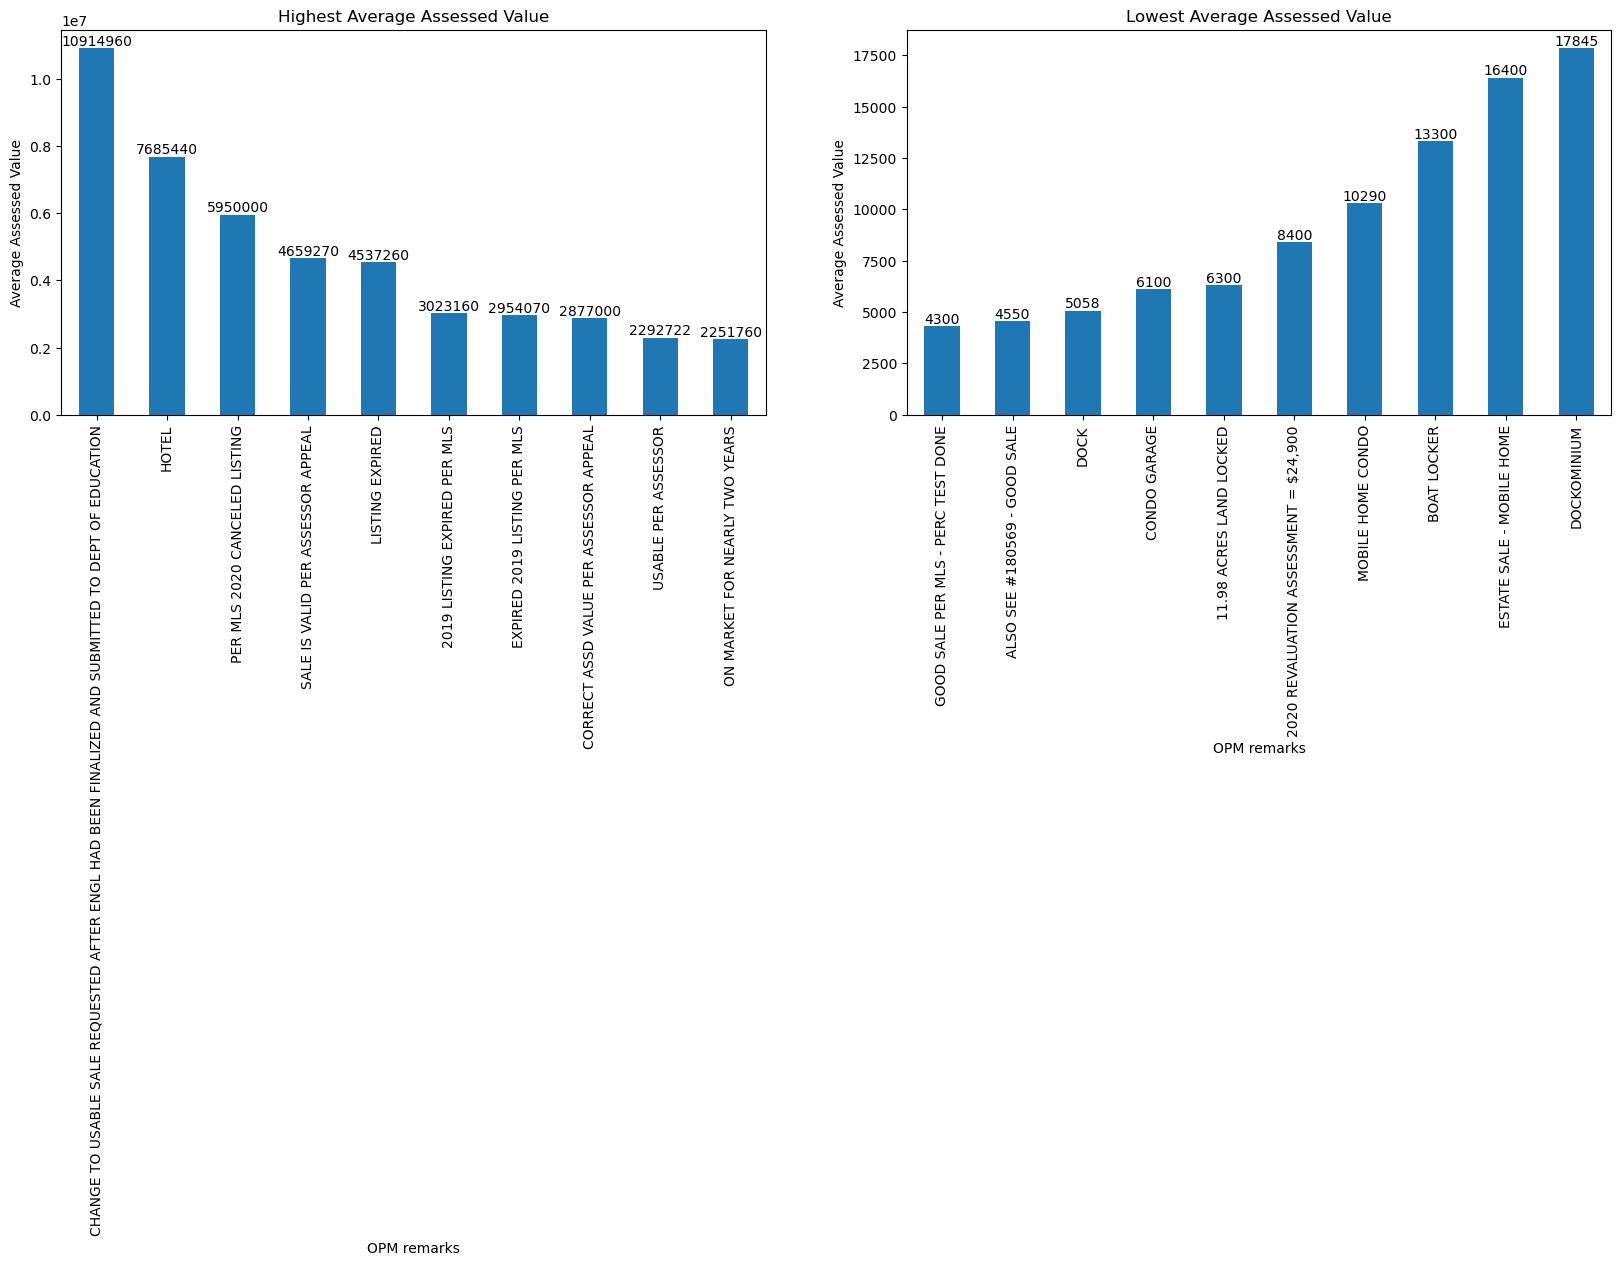

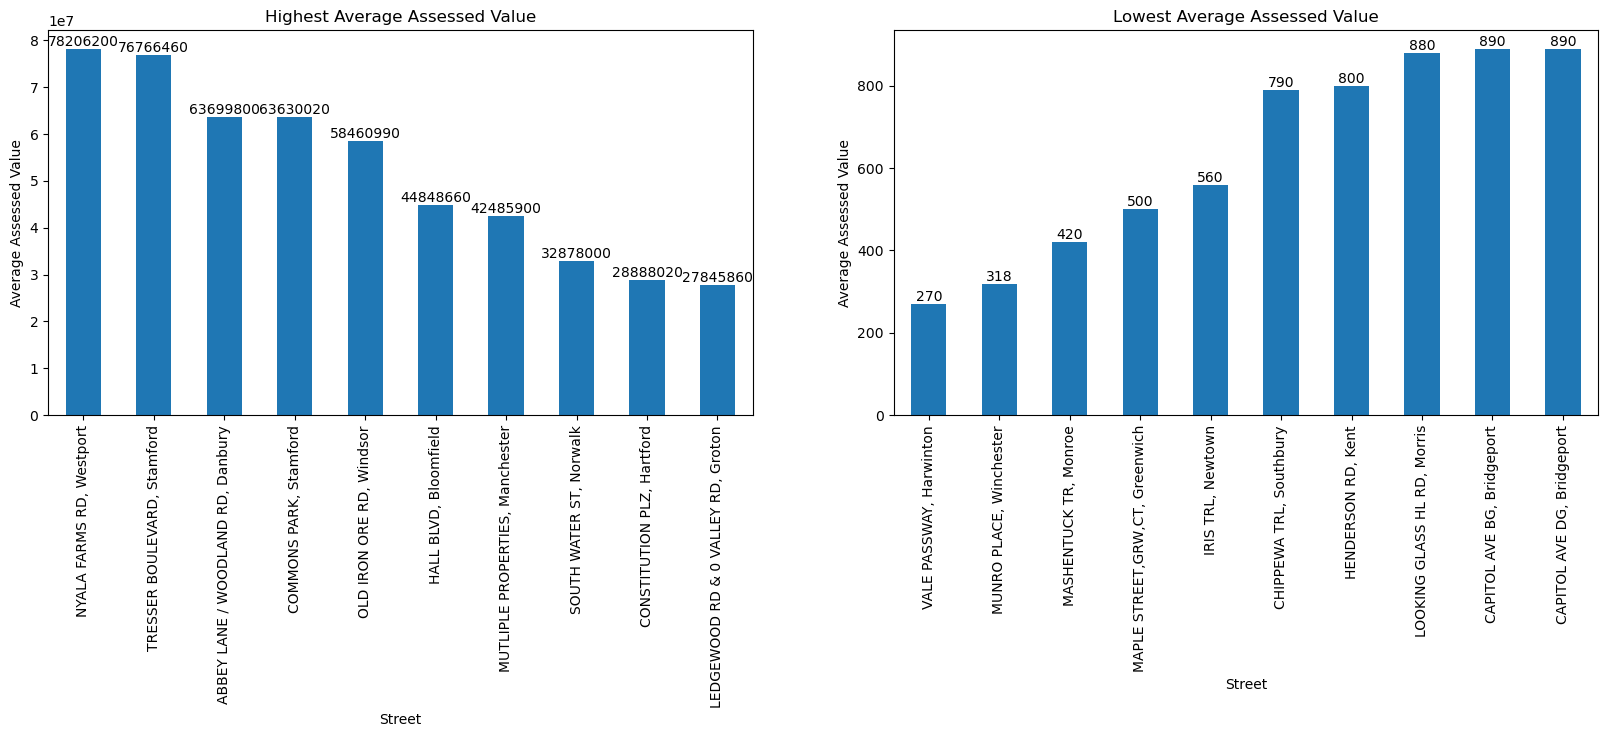

In [29]:
results = 'Assessed Value'

for col in numeric_columns:
    if col == results:
        continue
        
    plt.figure(figsize=(16,4))
    df.groupby(pd.cut(df[col],bins = 20),observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in bar_columns:
    
    plt.figure(figsize=(16,4))
    ax = df.groupby(col,observed=False)[results].mean().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()
    
for col in large_bar_columns:
    
    fix, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))
    df.groupby(col,observed=False)[results].mean().nlargest(10).plot(kind='bar',ax=ax1)
    df.groupby(col,observed=False)[results].mean().nsmallest(10).plot(kind='bar',ax=ax2)

    ax1.set_title(f'Highest Average {results}')
    ax1.bar_label(ax1.containers[0],fmt='%.0f')
    ax1.set_ylabel(f'Average {results}')
        
    ax2.set_title(f'Lowest Average {results}')
    ax2.bar_label(ax2.containers[0],fmt='%.0f')
    ax2.set_ylabel(f'Average {results}')    
    
    plt.show()

## Average Sales Ratio

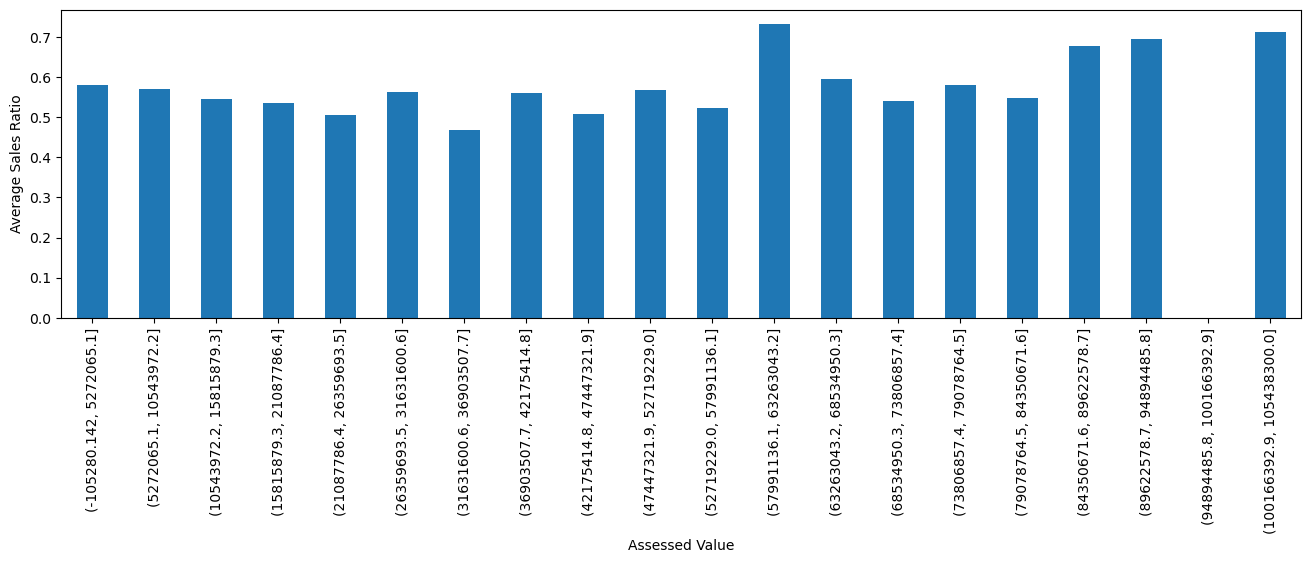

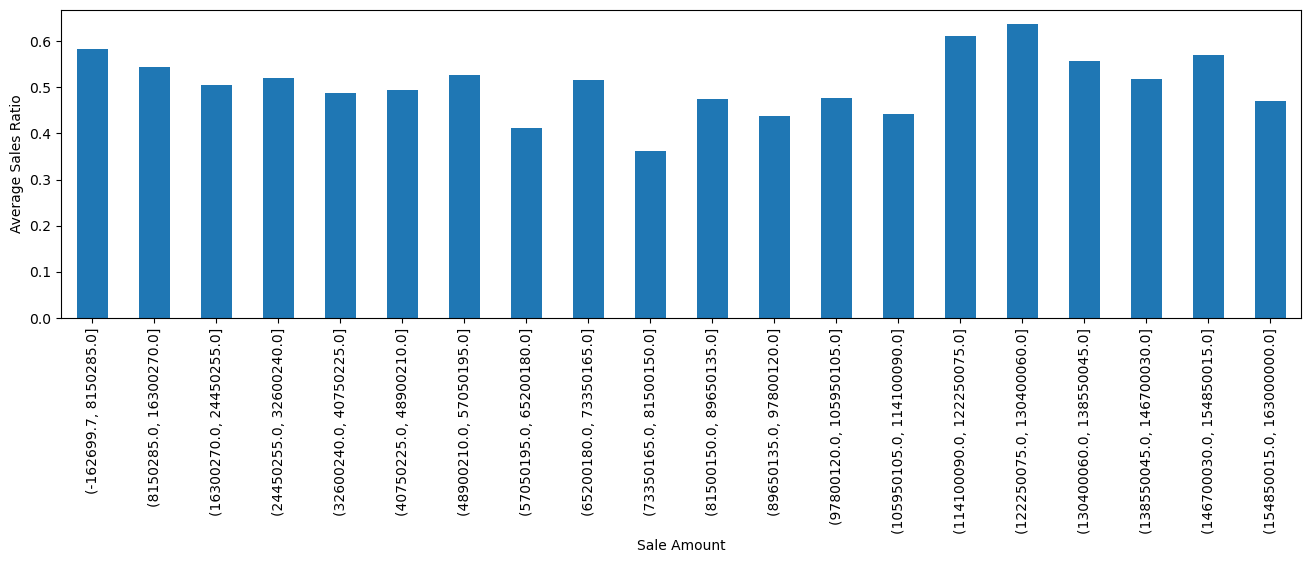

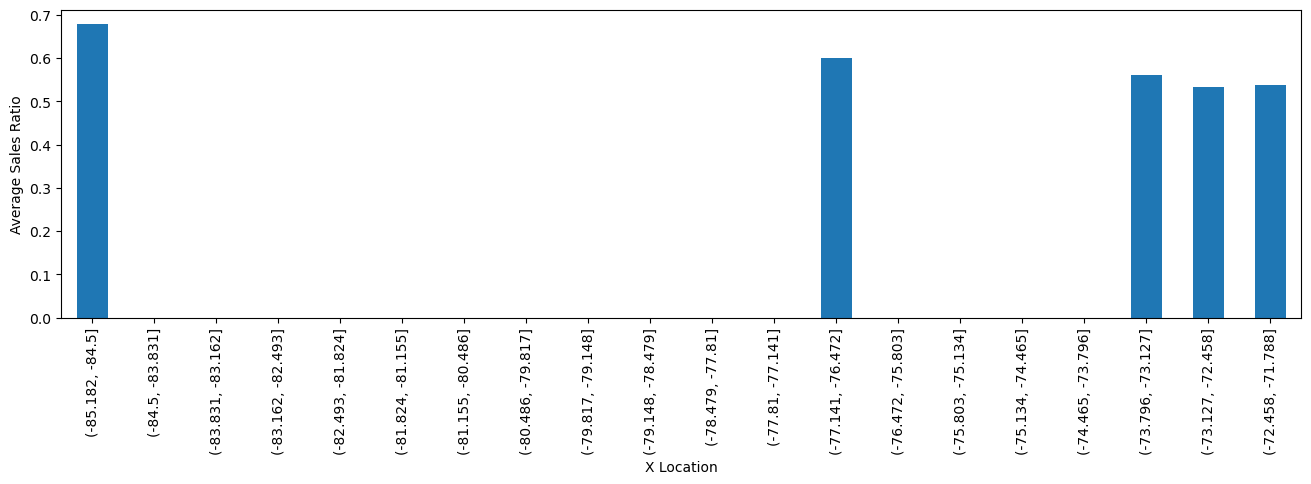

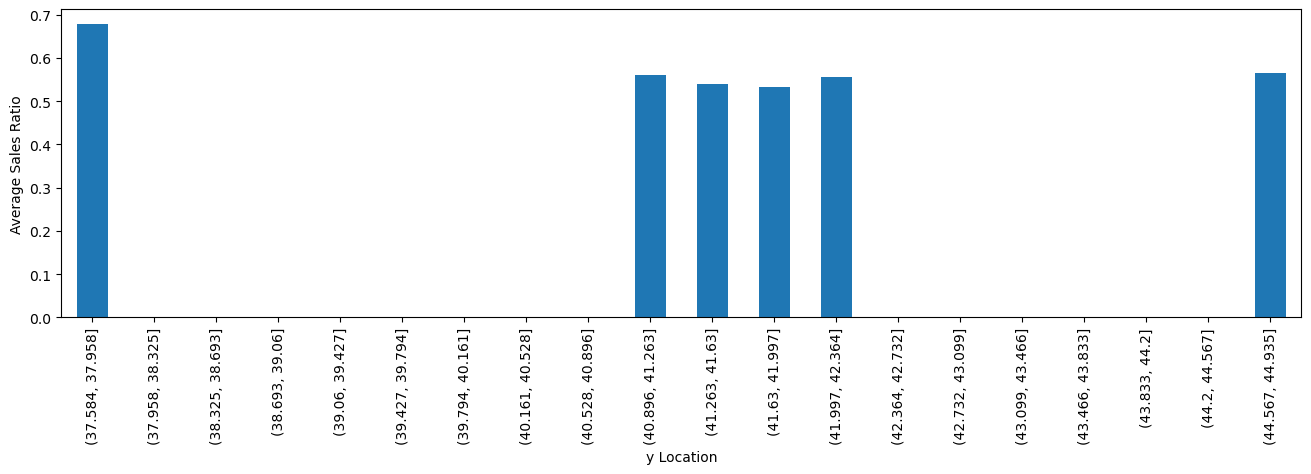

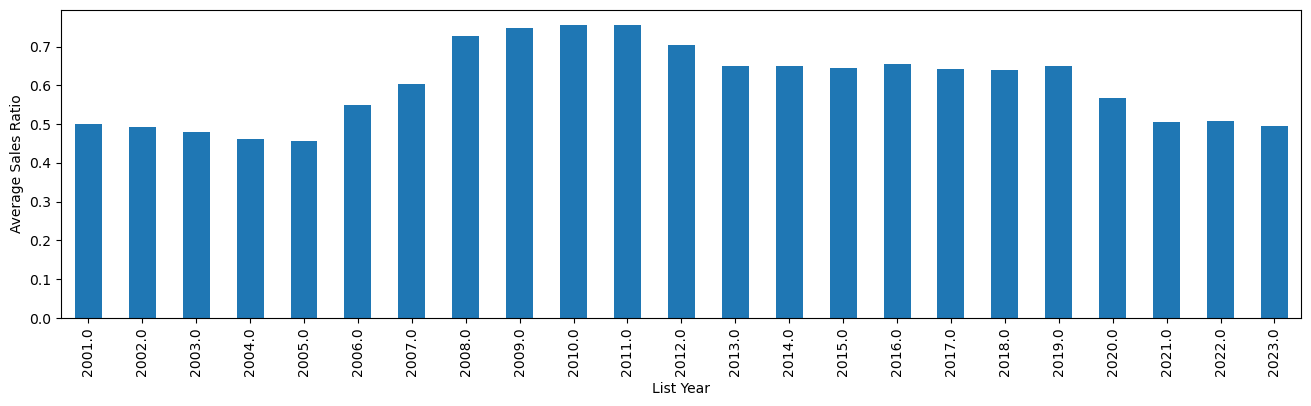

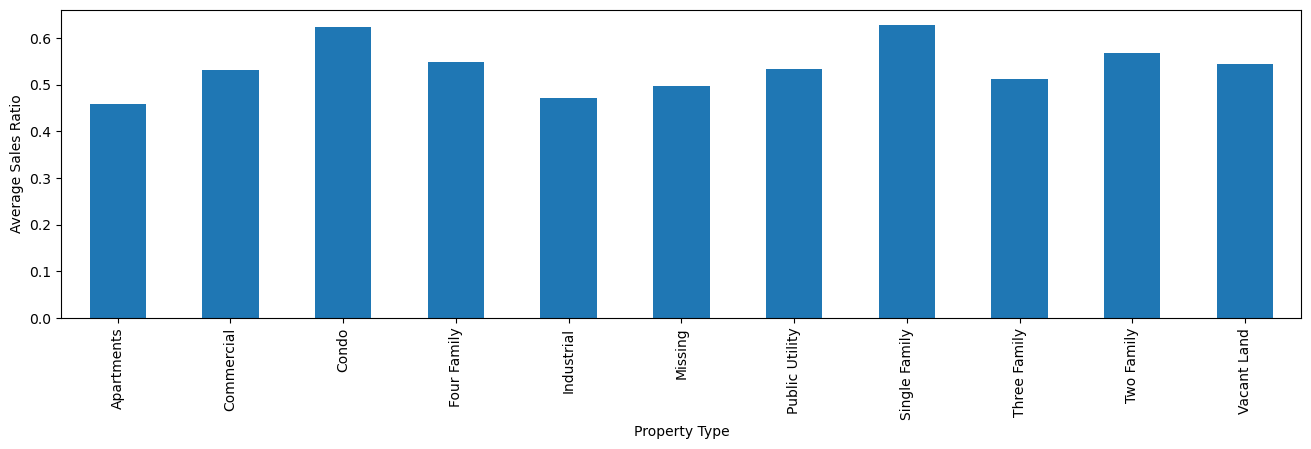

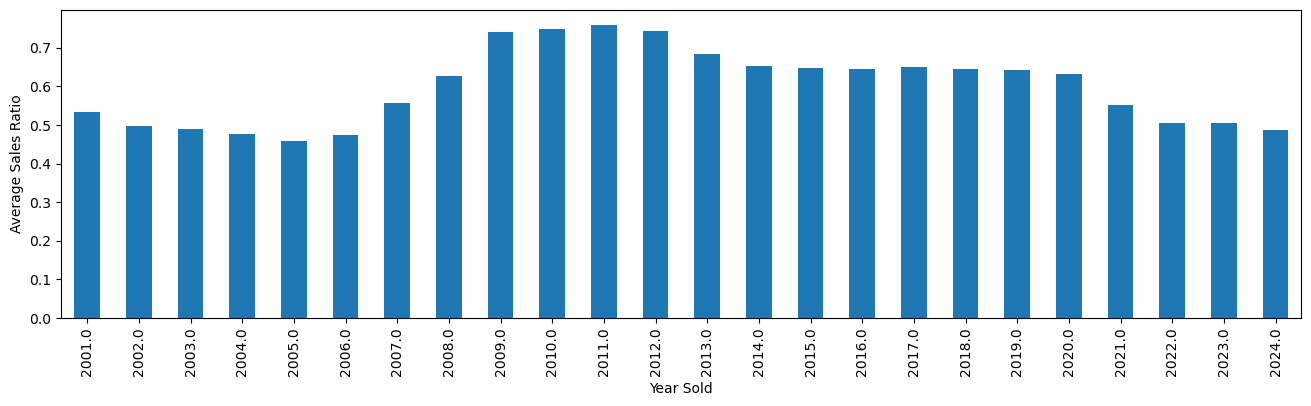

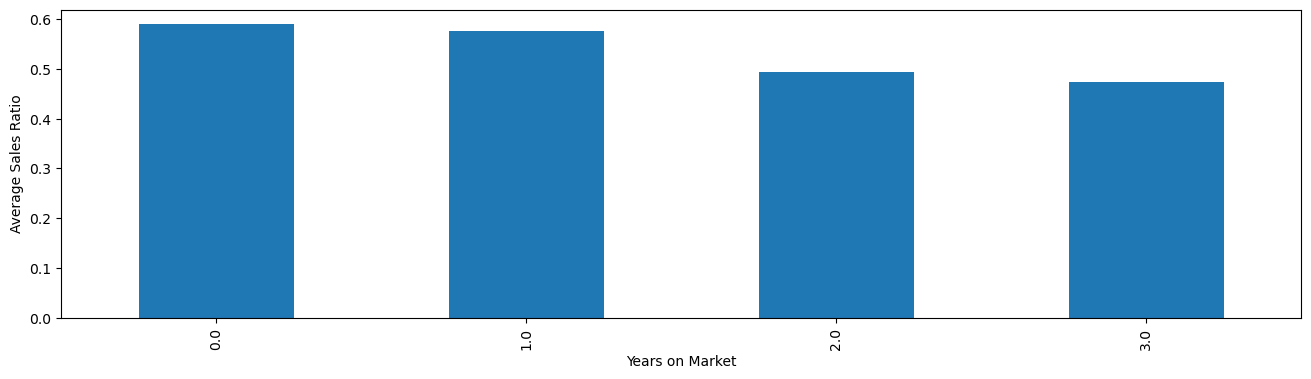

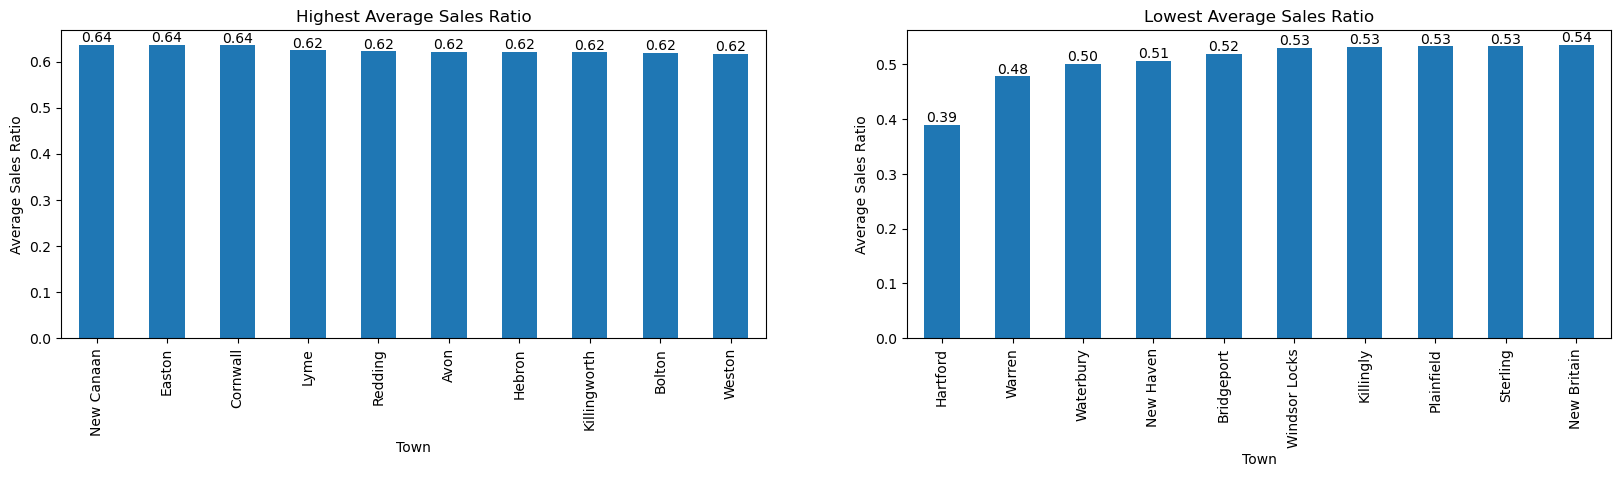

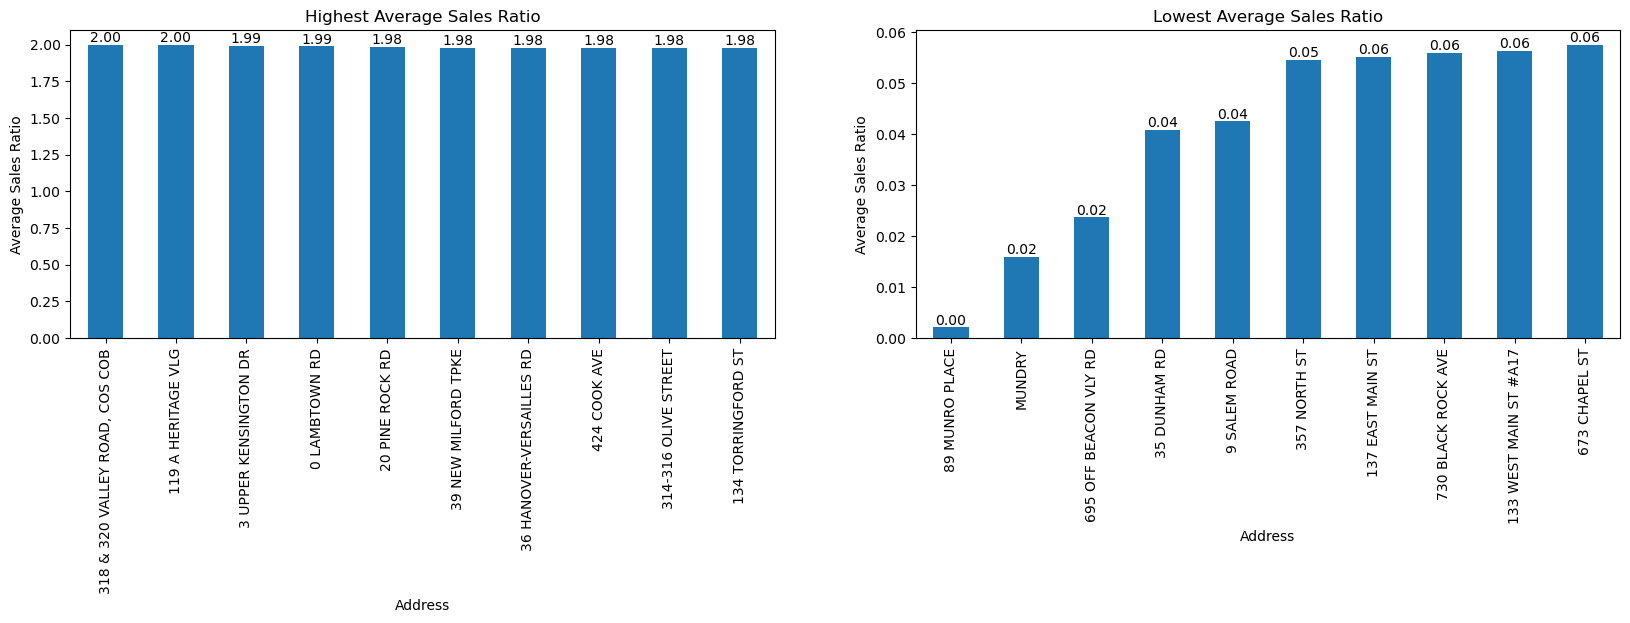

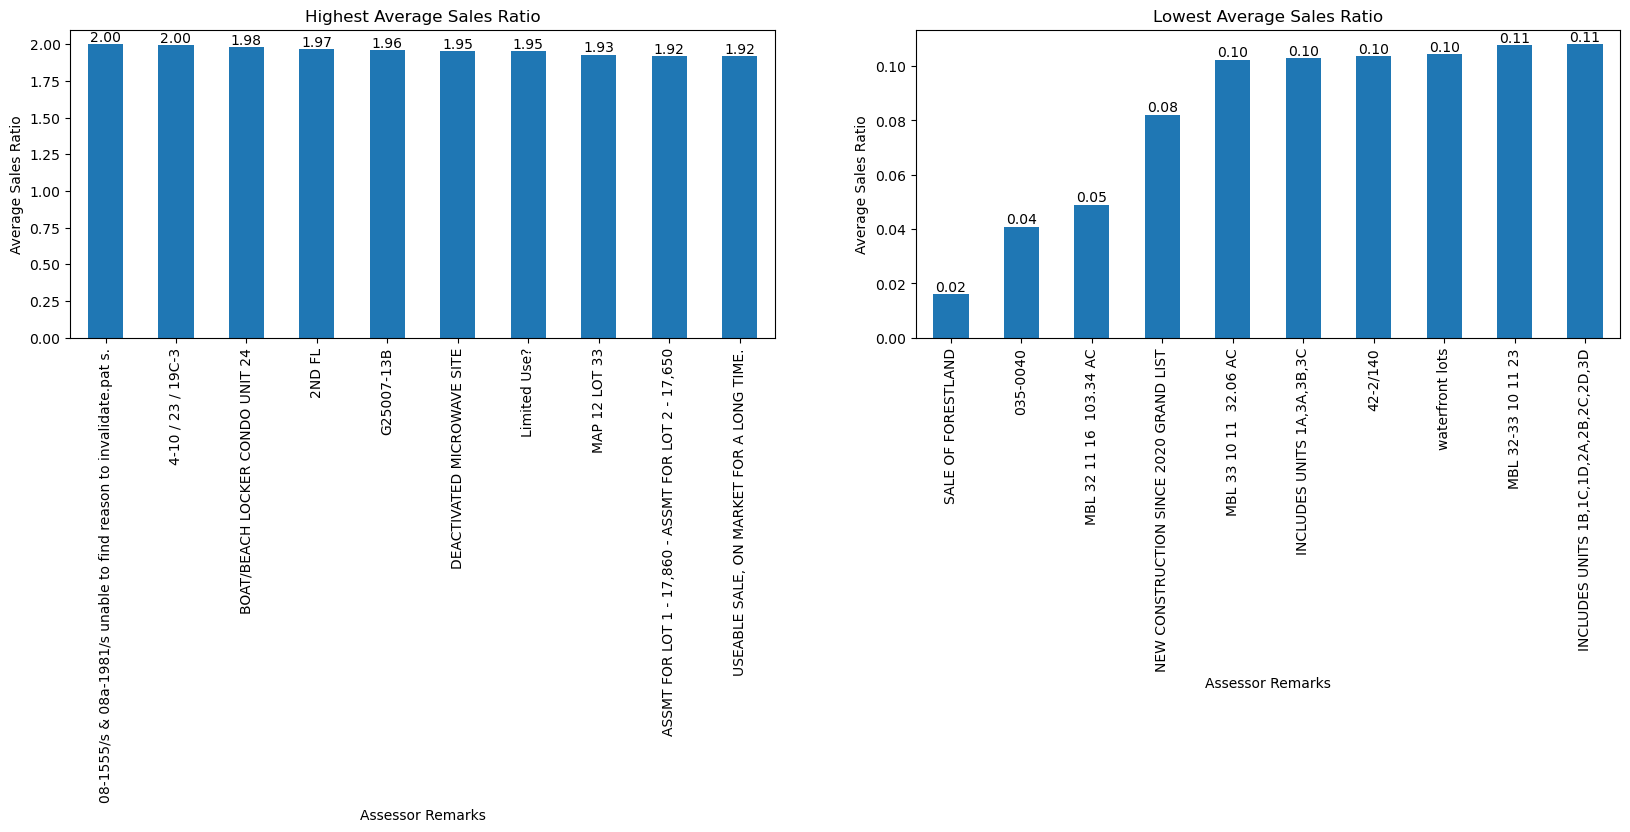

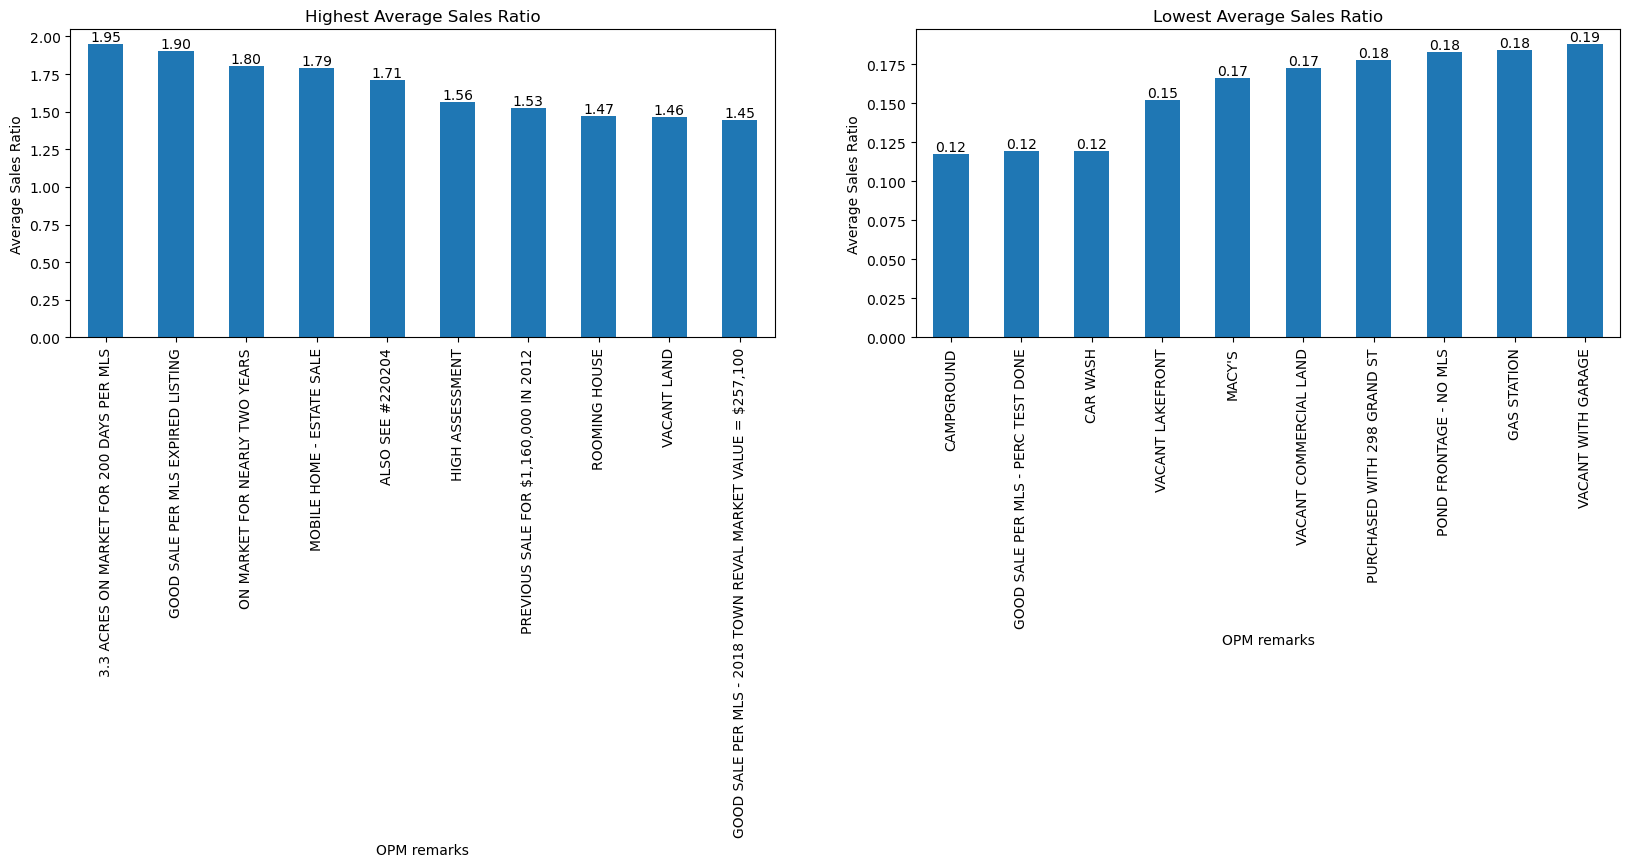

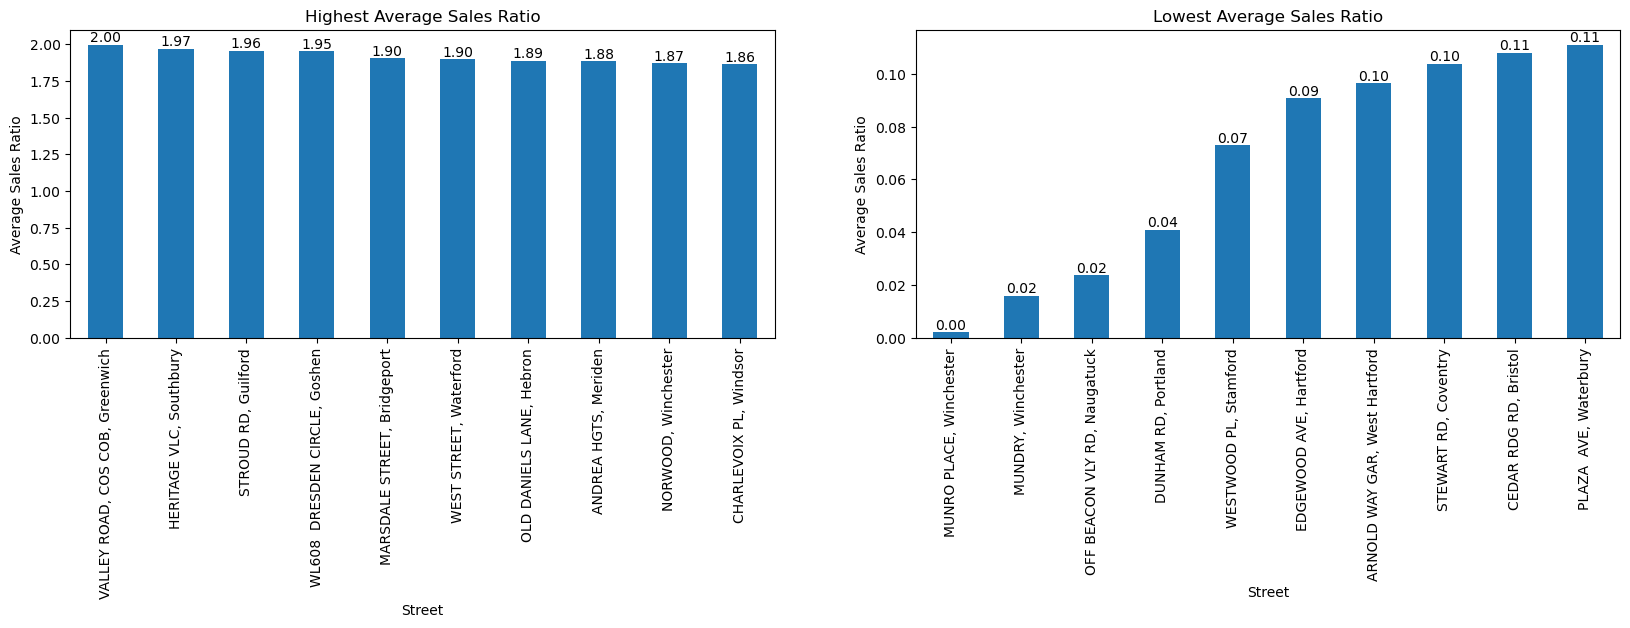

In [30]:
results = 'Sales Ratio'
for col in numeric_columns:
    if col == results:
        continue
        
    plt.figure(figsize=(16,4))
    data = df.groupby(pd.cut(df[col],bins = 20),observed=False)[['Assessed Value','Sale Amount']].sum()
    data = data['Assessed Value']/data['Sale Amount']
    data.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()

for col in bar_columns:
    
    plt.figure(figsize=(16,4))
    data = df.groupby(col,observed=False)[['Assessed Value','Sale Amount']].sum()
    data = data['Assessed Value']/data['Sale Amount']
    ax = data.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel(f'Average {results}')
    plt.show()


for col in large_bar_columns:
    
    fix, (ax1, ax2) = plt.subplots(1,2,figsize=(20,4))
    data = df.groupby(col,observed=False)[['Assessed Value','Sale Amount']].sum()
    data1 = (data['Assessed Value']/data['Sale Amount']).nlargest(10)
    data1.plot(kind='bar',ax=ax1)
    ax1.bar_label(ax1.containers[0],fmt='%.2f')
    ax1.set_ylabel(f'Average {results}')
    ax1.set_title(f'Highest Average {results}')

    data2 = (data['Assessed Value']/data['Sale Amount']).nsmallest(10)
    data2.plot(kind='bar',ax=ax2)
    ax2.bar_label(ax2.containers[0],fmt='%.2f')
    ax2.set_ylabel(f'Average {results}')
    ax2.set_title(f'Lowest Average {results}')

    
    plt.show()

Based on the data, the best town to sell property in is Hartford. The best street for sellers is Dunham Rd, Portland and the best street in Hartford for sellers is Edgewood Ave.


The best towns for buyers, on the other hand, are New Canaan, Easton, and Cornwall, and the best street is Lower Blissville Road, Lisbon

# Model Building

## Pipeline

OneHotEncoder is good for small cardinality features like Property Type and Month Sold, but for the high-cardinality features like Street, OneHotEncoder is impractical and instead, TargetEncoder can be used



In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler, TargetEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from pandas import Series, DataFrame
from sklearn.base import BaseEstimator, RegressorMixin


def make_pipeline(
    X:DataFrame,
    estimator:BaseEstimator=Ridge(),
)->Pipeline:
    
    categories = 'auto'
    '''if 'Property Type' in X.columns:
        categories = [
            [
                'Single Family',
                'Missing',
                'Condo',
                'Two Family',
                'Three Family',
                'Commercial',
                'Vacant Land',
                'Four Family',
                'Apartments',
                'Industrial',
                'Public Utility',
            ]
        ]
    
    small_encoder = OneHotEncoder(
        handle_unknown='warn',
        sparse_output=False,
        categories=categories,
    )'''

    large_encoder = TargetEncoder()

    small_columns = []
    large_columns = []
    impute_columns = []
    
    for col in X.columns:
        if col in [
            'Property Type',
        ]:
            #small_columns.append(col)
            large_columns.append(col)

            
        if col in [
            'Town',
            'Address',
            'Assessor Remarks',
            'OPM remarks',
            'Street',
        ]:
            large_columns.append(col)
        if col in [
            'X Location',
            'y Location',
        ]:
            impute_columns.append(col)

    transformers = []
    if isinstance(estimator,Ridge):
        transformers.append(
            (
                'impute',
                SimpleImputer(
                    missing_values=np.nan,
                    strategy='mean',
                ),
                impute_columns,
            )
        )
    
    if small_columns:
        transformers.append(
            (
                'small_encode',
                small_encoder,
                small_columns,
            )
        )
    if large_columns:
        transformers.append(
            (
                'large_encode',
                large_encoder,
                large_columns,
            )
        )
    
    column_trans = ColumnTransformer(
        transformers=transformers,
        remainder='passthrough',
    )
    column_trans.set_output(transform='pandas')
    
    pipe = Pipeline(
        steps=[
            (
                'encode',   
                column_trans,
            ),  
            (
                'scale',   
                StandardScaler(),
            ),
            (
                'estimator',
                estimator,
            ),
        ]
    )
    return pipe

def make_grid(
    X:DataFrame,
    estimators:dict|list[dict],
)->GridSearchCV:

    grid = GridSearchCV(
        make_pipeline(X),
        estimators,
        cv=2,
        n_jobs=1,
    )
    return grid

def predict_results(
    X_train:DataFrame,
    X_test:DataFrame,
    y_train:Series,
    y_test:Series,
    model:BaseEstimator,
)->np.ndarray:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    return y_pred

## Estimators

Wrapper for XGBoost so it can run on cuda

In [32]:
import cupy as cp

class XGBWrapper(
    BaseEstimator, 
    RegressorMixin,
):
    def __init__(
        self:BaseEstimator, 
        max_depth:int=6,
        alpha:int=0,
        max_bin:int=256,
        **xgb_params:object,
    ):
        self.xgb_params = xgb_params
        self.model = None
        self._is_fitted = False
        self.max_depth = max_depth
        self.alpha = alpha
        self.max_bin = max_bin

    def fit(
        self:BaseEstimator,
        X:DataFrame,
        y:Series,
    )->BaseEstimator:
        self.model = XGBRegressor(
            alpha=self.alpha,
            max_depth=self.max_depth,
            n_jobs=1,
            **self.xgb_params,
        )
        self.model.fit(cp.asarray(X),cp.asarray(y))
        self.model.get_booster().set_param({'device': 'cuda'})
        self._is_fitted = True
        self.n_features_in_ = X.shape[1]
        return self
        
    def predict(
        self:BaseEstimator,
        X:Series,
    )->np.ndarray:
        return self.model.predict(cp.asarray(X))

    def get_XGBRegressor(self)->BaseEstimator:
        return self.model

In [33]:
from sklearn.linear_model import LinearRegression, Lars, BayesianRidge, ARDRegression, RANSACRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor
import warnings

def make_estimators(e_types:list|str)->list[dict]:
    estimators = []
    if 'linear' in e_types:
        estimators.extend(
            [
                {
                    'scale':[StandardScaler(),RobustScaler()],
                    'estimator':[Ridge()],
                    'estimator__alpha':[0,0.1,0.5,1],   
                },

                {                    
                    'scale':[StandardScaler(),RobustScaler()],
                    'estimator':[ARDRegression()],         
                    'estimator__alpha_1':[1e-6,0.1],
                    'estimator__alpha_2':[1e-6,0.1],
                }
            ]
        )
    if 'tree' in e_types:
        estimators.extend(
            [               
                {               
                    'scale':[StandardScaler()],
                    'estimator':[
                        XGBWrapper(               
                            tree_method='hist',
                            device='cuda',
                            enable_categorical=True,
                            sampling_method='gradient_based',
                            max_depth=9,
                        ),
                    ],
                    'estimator__max_depth':[9],
                    'estimator__max_bin':[512,1024],
                    'estimator__alpha':[0.1,0.5,0.9],
                },            
                #{
                #    'scale':[StandardScaler()],
                #    'estimator':[
                #        HistGradientBoostingRegressor(
                #            categorical_features='from_dtype',
                #            max_leaf_nodes=None,
                #        )       
                #    ],
                #    'estimator__learning_rate':[0.01,0.1,0.5,1],
                #    'estimator__max_iter':[100,200,500],
                #},
                #{
                #    'scale':[StandardScaler()],
                #    'estimator':[
                #        LGBMRegressor(
                #            #num_leaves=63,
                #            n_jobs=-1,
                #            verbose=-1,
                #        )
                #    ],
                #    'estimator__num_leaves':[127,255,511],
                #    'estimator__learning_rate':[0.01,0.1,0.5,1],
                #    'estimator__n_estimators':[100,200,500],   
                #},                
            ]   
        )
    return estimators

warnings.filterwarnings(
    "ignore",
    message="X does not have valid feature names",
    category=UserWarning,
)

# Results

## Plotting Functions

In [34]:
from sklearn.metrics import r2_score, PredictionErrorDisplay
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

def accuracy_plot(
    y_test:Series,
    y_pred:np.ndarray,
    feature:str,
    title:str,
    model_name:str,
)->None:
    r2 = r2_score(y_test, y_pred)
    fig, axs = plt.subplots(1,2,figsize=(16,8))
    fig.suptitle(title)
    
    x = np.linspace(
        min(min(y_test),
            min(y_pred)), 
        max(max(y_test),
            max(y_pred)), 
        100,
    )
    axs[0].plot(x, x, color='red',label=f'R^2 = {r2}')
    axs[0].scatter(y_test,y_pred, label=model_name)
    axs[0].set_title('Model Performance')
    axs[0].set_xlabel(f'True {feature}')
    axs[0].set_ylabel(f'Predicted {feature}')
    axs[0].legend()

    PredictionErrorDisplay.from_predictions(y_test,y_pred,ax=axs[1])
    axs[1].set_title('Residual Plot')
    plt.show()
    return None

def box_plots(
    X_train:DataFrame,
    X_test:DataFrame,
    y_train:Series,
    y_test:Series,
    model:BaseEstimator,
)->None:
    fig, axs = plt.subplots(2,figsize=(16,12))
    fig.suptitle('Permutation Importance')
    for X,y,ax,title in [
        (
            X_train,
            y_train,
            axs[0],
            'Training Results'
        ),
        (
            X_test,
            y_test,
            axs[1],
            'Testing Results'
        )
    ]:
        result = permutation_importance(
            model,
            X, 
            y,  
            #n_jobs=4,
        )
        pd.DataFrame(
            result.importances.T,
            columns=X.columns,
        ).boxplot(vert=False,whis=10,ax=ax)
        ax.set_title(title)
    plt.show()
    return None

def plot_partial_dependence(
    X_test:DataFrame,
    model:BaseEstimator,
)->None:
    fig, ax = plt.subplots(figsize=(16,8))
    PartialDependenceDisplay.from_estimator(
        model,
        X_test, 
        X_test.select_dtypes(include='number').columns,
        ax=ax,
        n_cols=5,
        grid_resolution=20,
        n_jobs=1,
    )
    plt.show()
    return None

def plot_results(
    X_train:DataFrame,
    X_test:DataFrame,
    y_train:Series,
    y_test:Series,
    y_pred:np.ndarray,
    model:BaseEstimator,
    feature:str,
)->None:

    model_name = str(model.best_estimator_['estimator'])
    accuracy_plot(y_train,model.predict(X_train),feature,'Training Results',model_name)
    accuracy_plot(y_test,y_pred,feature,'Testing Results',model_name)
    box_plots(X_train,X_test,y_train,y_test,model)
    plot_partial_dependence(X_test,model)

    return None

    

In [35]:
def predict_and_plot(
    X_train:DataFrame, 
    X_test:DataFrame, 
    y_train:Series,
    y_test:Series, 
    X_features:list[str], 
    y_feature:str, 
    estimators:dict|list[dict],
)->None:

    X_train = X_train[X_features].copy()
    X_test = X_test[X_features].copy()
    y_train = y_train[y_feature].copy()
    y_test = y_test[y_feature].copy()

    grid = make_grid(X_test,estimators)
    
    y_pred = predict_results(
        X_train,
        X_test,
        y_train,
        y_test,
        grid,
    )
    
    plot_results(
        X_train,
        X_test,
        y_train,
        y_test,
        y_pred,
        grid,
        y_feature,
    )
    
    return None

In [36]:
X = df.drop(['Serial Number','Address'],axis=1).copy()

y = df[['Sale Amount','Sales Ratio']]
X.head()

List Year     Town  Assessed Value  Sale Amount  Sales Ratio  \
0     2020.0  Ansonia        133000.0     248400.0       0.5354   
1     2020.0  Ansonia        110500.0     239900.0       0.4606   
2     2020.0  Ansonia        150500.0     325000.0       0.4630   
3     2020.0  Ansonia        127400.0     202500.0       0.6291   
4     2021.0     Avon        179990.0     362500.0       0.4965   

   Property Type Assessor Remarks OPM remarks                Street  \
0  Single Family          Missing     Missing    BEAVER ST, Ansonia   
1   Three Family          Missing     Missing   JACKSON ST, Ansonia   
2     Commercial          Missing     Missing  WAKELEE AVE, Ansonia   
3     Two Family          Missing     Missing     PLATT ST, Ansonia   
4          Condo          Missing     Missing     BYRON DRIVE, Avon   

   X Location  y Location  sin(Day of Week Sold)  cos(Day of Week Sold)  \
0  -73.068220   41.350140               0.974928              -0.222521   
1         NaN         NaN               0.974928              -0.222521   
2         NaN         NaN               0.000000               1.000000   
3         NaN         NaN               0.000000               1.000000   
4  -72.879116   41.773453               0.000000               1.000000   

   sin(Day of Year Sold)  cos(Day of Year Sold)  Year Sold  Years on Market  
0               0.976011              -0.217723     2021.0              1.0  
1               0.587785              -0.809017     2021.0              1.0  
2              -0.953681              -0.300820     2021.0              1.0  
3              -0.271958               0.962309     2020.0              0.0  
4               0.196673              -0.980469     2022.0              1.0

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Predicting Sale Amount

In [38]:
'''
x_features = [
    'List Year',
    'Town',
    'Assessed Value',
    'Property Type',
    'Street',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
    'X Location',
    'y Location',
    'sin(Day of Year Sold)',
    'cos(Day of Year Sold)',
    'sin(Day of Week Sold)',
    'cos(Day of Week Sold)',
]


y_feature = 'Sale Amount'

estimators = make_estimators('linear')

for estimator in estimators:
    predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature, estimator)
'''

"\nx_features = [\n    'List Year',\n    'Town',\n    'Assessed Value',\n    'Property Type',\n    'Street',\n    'Year Sold',\n    'Years on Market',\n    'Assessor Remarks',\n    'OPM remarks',\n    'X Location',\n    'y Location',\n    'sin(Day of Year Sold)',\n    'cos(Day of Year Sold)',\n    'sin(Day of Week Sold)',\n    'cos(Day of Week Sold)',\n]\n\n\ny_feature = 'Sale Amount'\n\nestimators = make_estimators('linear')\n\nfor estimator in estimators:\n    predict_and_plot(X_train, X_test, y_train, y_test, x_features, y_feature, estimator)\n"

## Control: Predicting Sale Amount With only Assessed Value

In [39]:
'''
X_features = ['Assessed Value']
y_feature = 'Sale Amount'
estimators = make_estimators('linear')

for estimator in estimators:
    predict_and_plot(X_train, X_test, y_train, y_test, X_features, y_feature, estimator)
'''

"\nX_features = ['Assessed Value']\ny_feature = 'Sale Amount'\nestimators = make_estimators('linear')\n\nfor estimator in estimators:\n    predict_and_plot(X_train, X_test, y_train, y_test, X_features, y_feature, estimator)\n"

## Predicting Sale Amount Without Assessed Value

In [40]:
'''
X_features = [
    'List Year',
    'Town',
    'Property Type',
    'Street',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',    
    'X Location',
    'y Location',
    'sin(Day of Year Sold)',
    'cos(Day of Year Sold)',
    'sin(Day of Week Sold)',
    'cos(Day of Week Sold)',
]

y_feature = 'Sale Amount'

estimators = make_estimators(['linear'])

for estimator in estimators:
    predict_and_plot(X_train, X_test, y_train, y_test, X_features, y_feature, estimator)
'''

"\nX_features = [\n    'List Year',\n    'Town',\n    'Property Type',\n    'Street',\n    'Year Sold',\n    'Years on Market',\n    'Assessor Remarks',\n    'OPM remarks',    \n    'X Location',\n    'y Location',\n    'sin(Day of Year Sold)',\n    'cos(Day of Year Sold)',\n    'sin(Day of Week Sold)',\n    'cos(Day of Week Sold)',\n]\n\ny_feature = 'Sale Amount'\n\nestimators = make_estimators(['linear'])\n\nfor estimator in estimators:\n    predict_and_plot(X_train, X_test, y_train, y_test, X_features, y_feature, estimator)\n"

## Predicting Sale Ratio

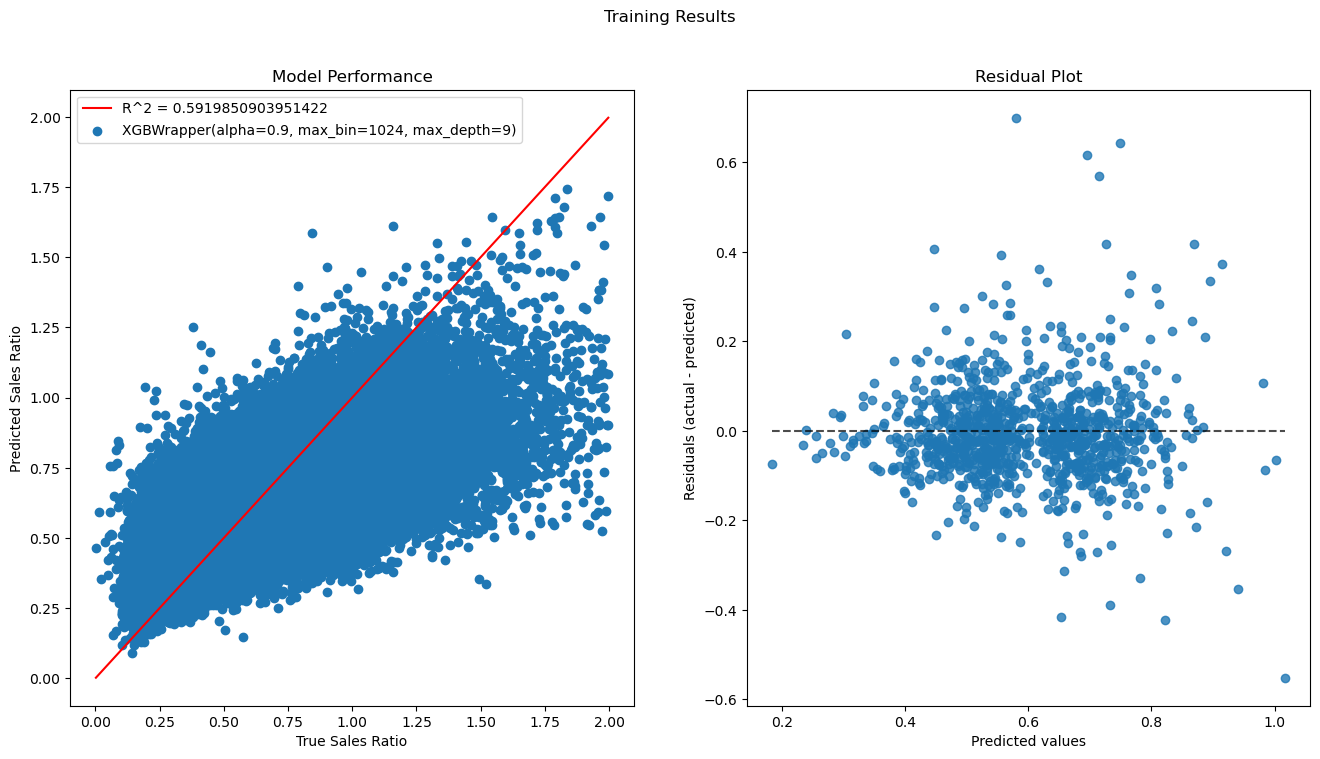

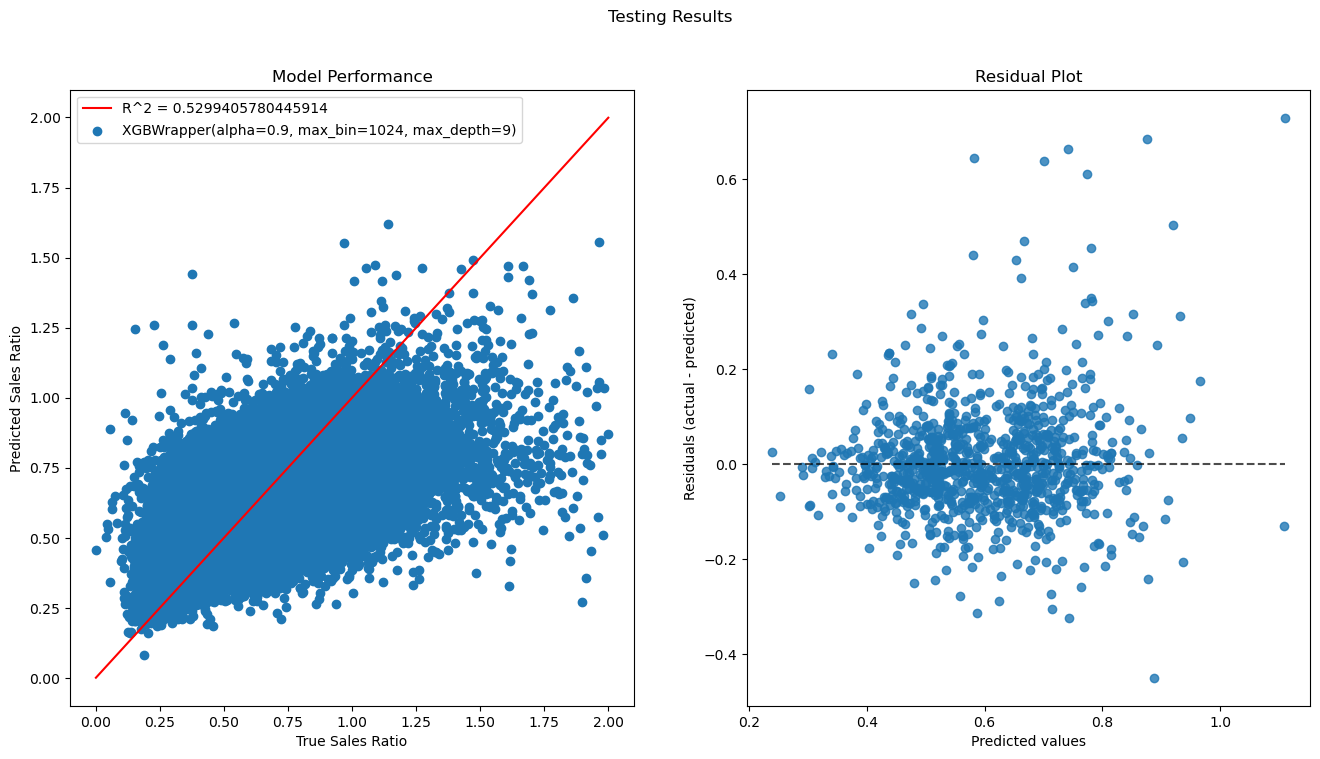

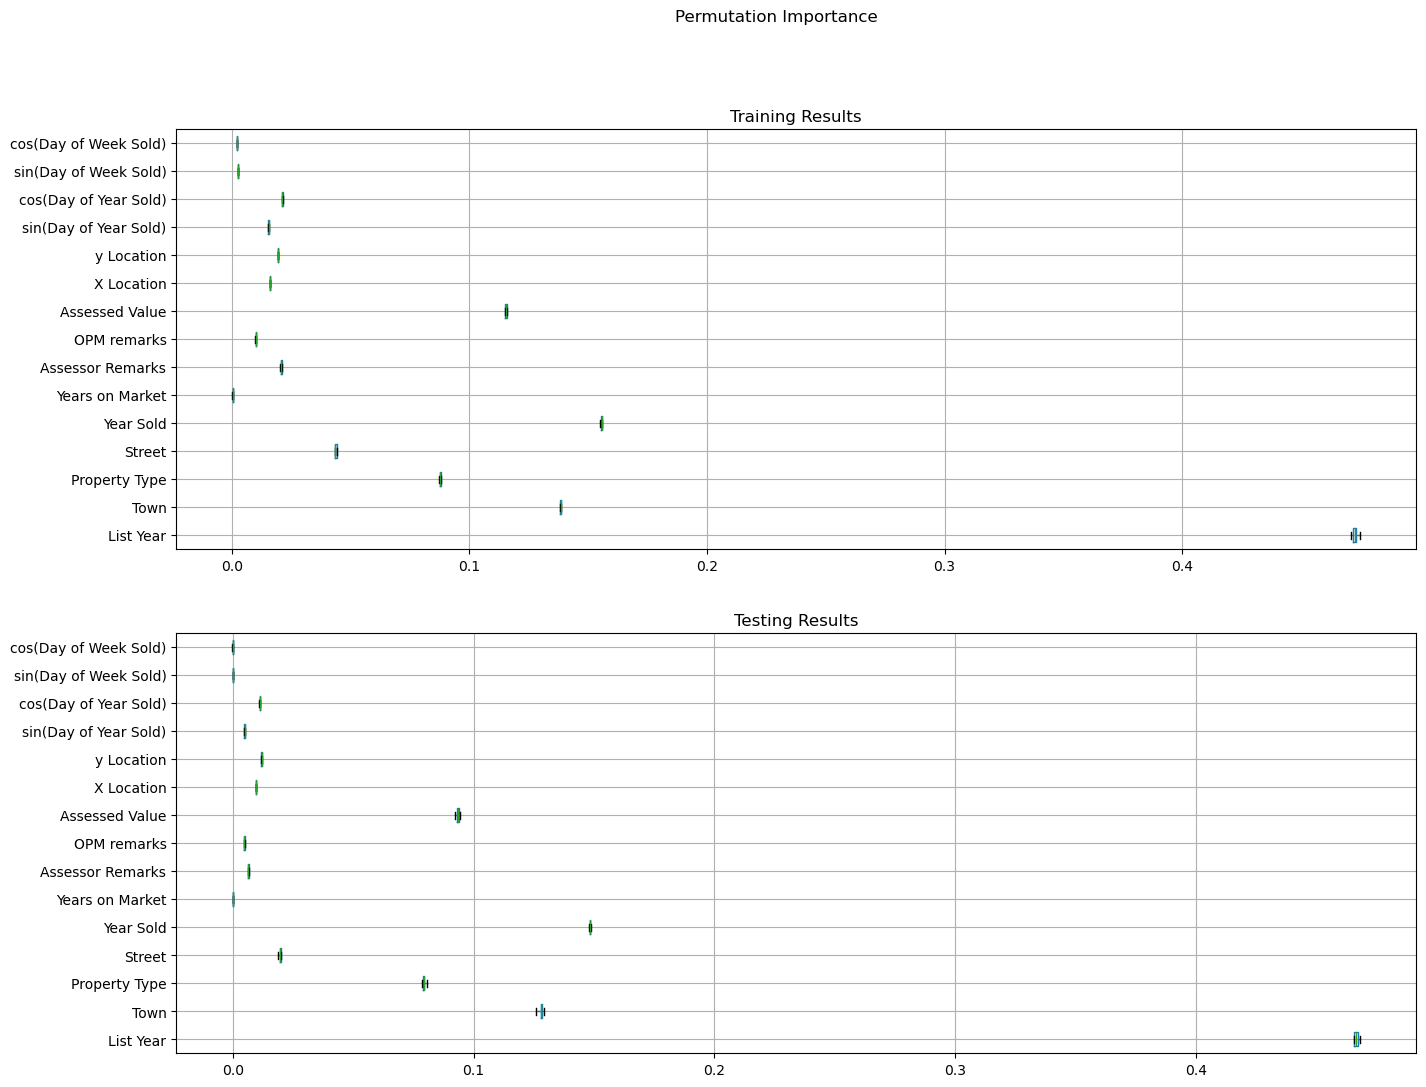

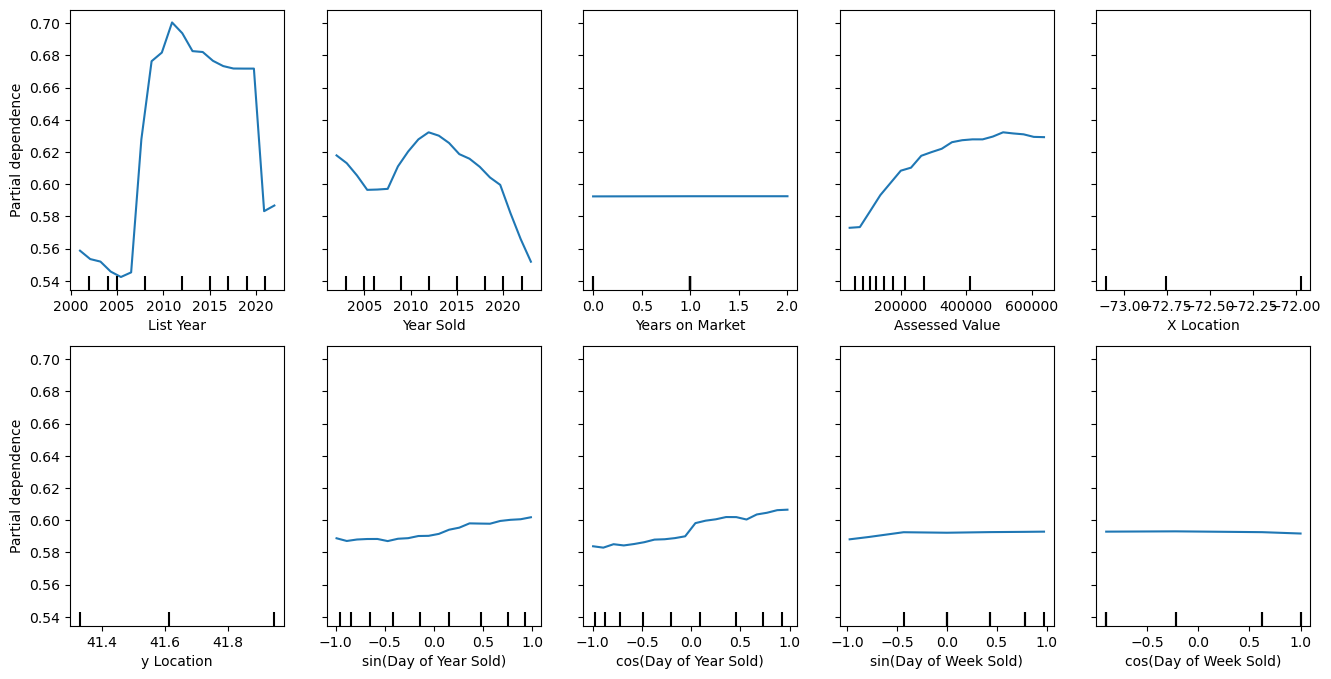

In [41]:

X_features = [
    'List Year',
    'Town',
    'Property Type',
    'Street',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
    'Assessed Value',
    'X Location',
    'y Location',
    'sin(Day of Year Sold)',
    'cos(Day of Year Sold)',
    'sin(Day of Week Sold)',
    'cos(Day of Week Sold)',
]

y_feature = 'Sales Ratio'

estimators = make_estimators('tree')

for estimator in estimators:
    predict_and_plot(X_train, X_test, y_train, y_test, X_features, y_feature, estimator)


## Sale Ratios in towns with highest Assessed Values

In [42]:
#df2 = df[df['Town'].isin({'Greenwich','New Canaan','Darien','Westport','Wilton','Washington','Roxbury','Ridgefield','Fairfield'})]
df2 = df[df['List Year'] >= 2023]

X2 = df2.drop(['Serial Number','Address'],axis=1).copy()

y2 = df2[['Sale Amount','Sales Ratio']]
X2.head()

List Year      Town  Assessed Value  Sale Amount  Sales Ratio  \
1097629     2023.0    Bethel        103950.0     100000.0       1.0395   
1097630     2023.0    Bethel        104580.0     257000.0       0.4069   
1097631     2023.0  Branford        110700.0     290000.0       0.3817   
1097633     2023.0  Cornwall        414260.0     632769.0       0.6546   
1097634     2023.0     Derby        100100.0     304000.0       0.3292   

        Property Type Assessor Remarks OPM remarks                     Street  \
1097629   Vacant Land   M/B/L 87 70 10     Missing       SHELLEY ROAD, Bethel   
1097630   Vacant Land    MBL 64/57/54B     Missing   DODGINGTOWN ROAD, Bethel   
1097631         Condo          Missing     Missing  JEFFERSON WOODS, Branford   
1097633   Vacant Land          Missing     Missing      BRADFORD RD, Cornwall   
1097634         Condo          Missing     Missing          ORANGEWOOD, Derby   

         X Location  y Location  sin(Day of Week Sold)  cos(Day of Week Sold)  \
1097629         NaN         NaN               0.974928              -0.222521   
1097630         NaN         NaN               0.000000               1.000000   
1097631         NaN         NaN               0.433884              -0.900969   
1097633         NaN         NaN               0.000000               1.000000   
1097634         NaN         NaN               0.433884              -0.900969   

         sin(Day of Year Sold)  cos(Day of Year Sold)  Year Sold  \
1097629               0.608477               0.793572     2024.0   
1097630              -0.128748              -0.991677     2024.0   
1097631              -0.171293               0.985220     2023.0   
1097633               0.478734               0.877960     2024.0   
1097634               0.409356              -0.912375     2024.0   

         Years on Market  
1097629              1.0  
1097630              1.0  
1097631              0.0  
1097633              1.0  
1097634              1.0

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)

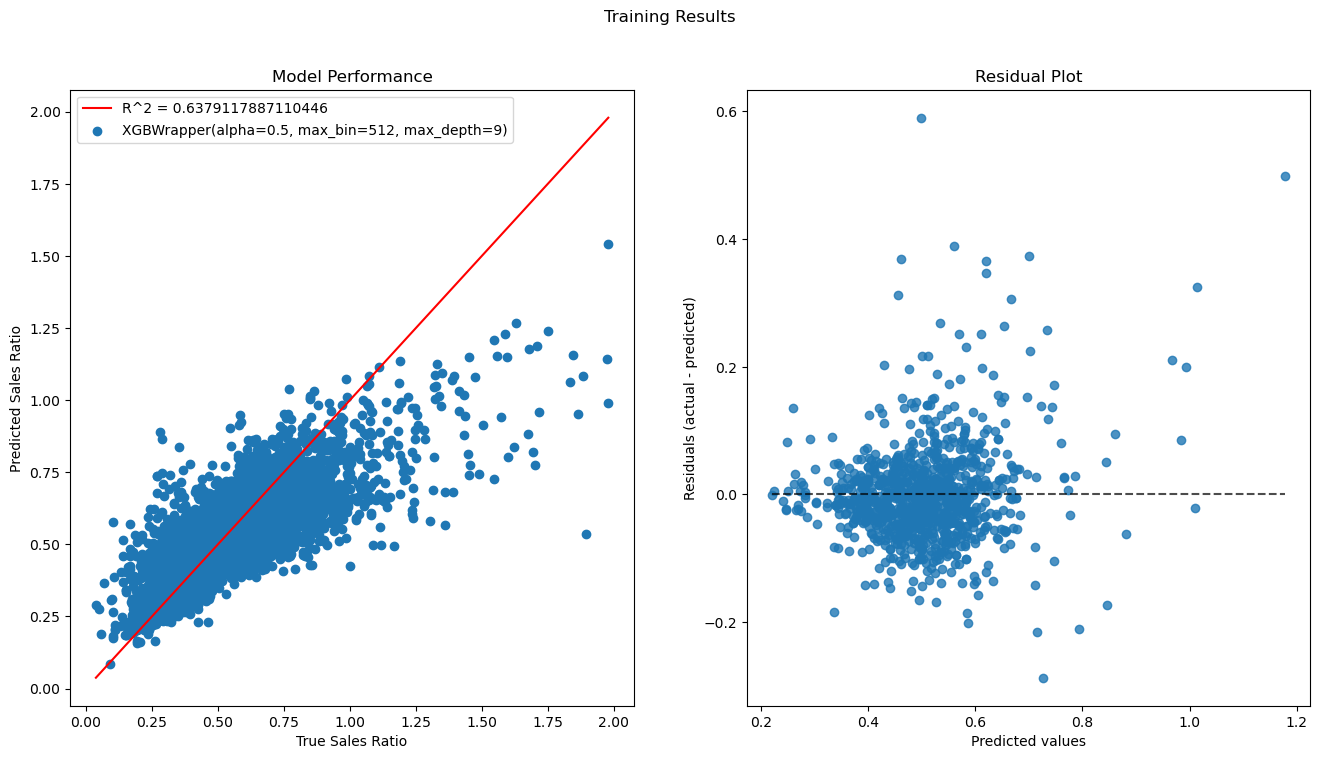

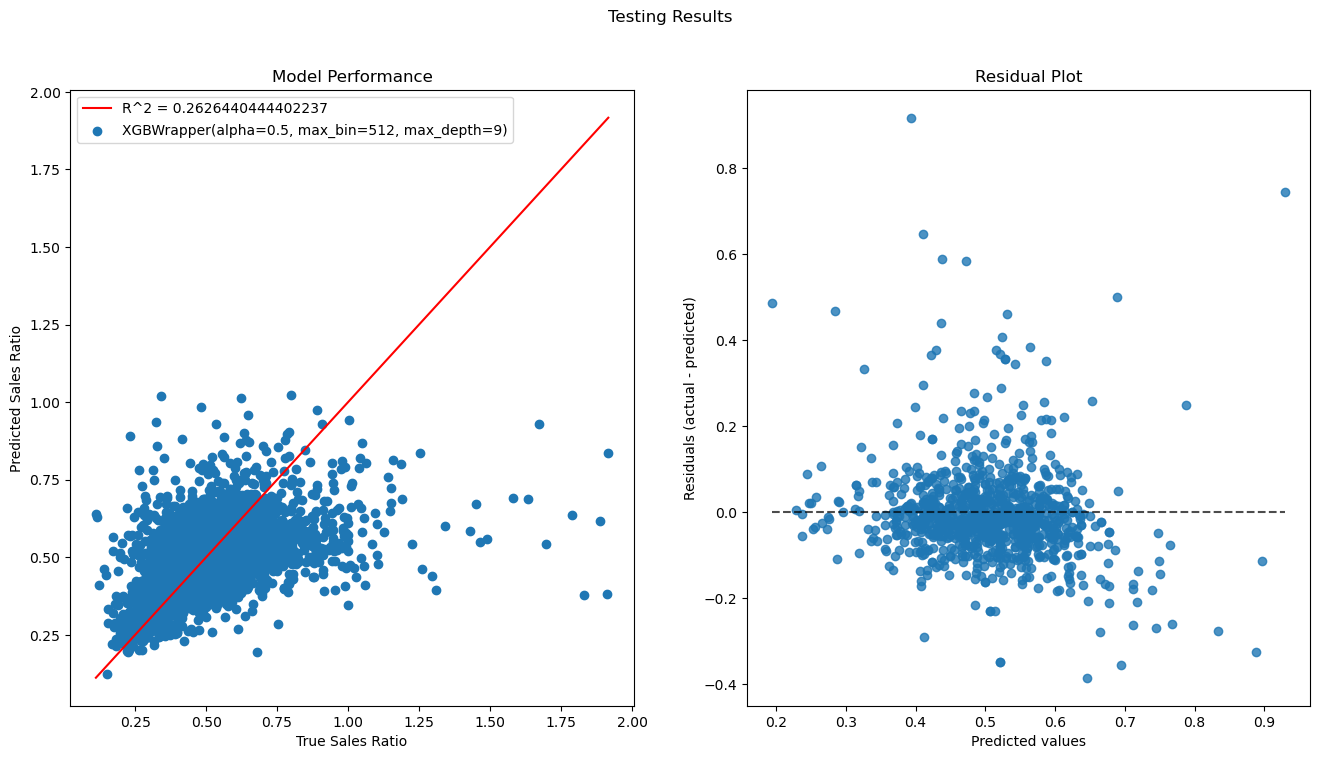

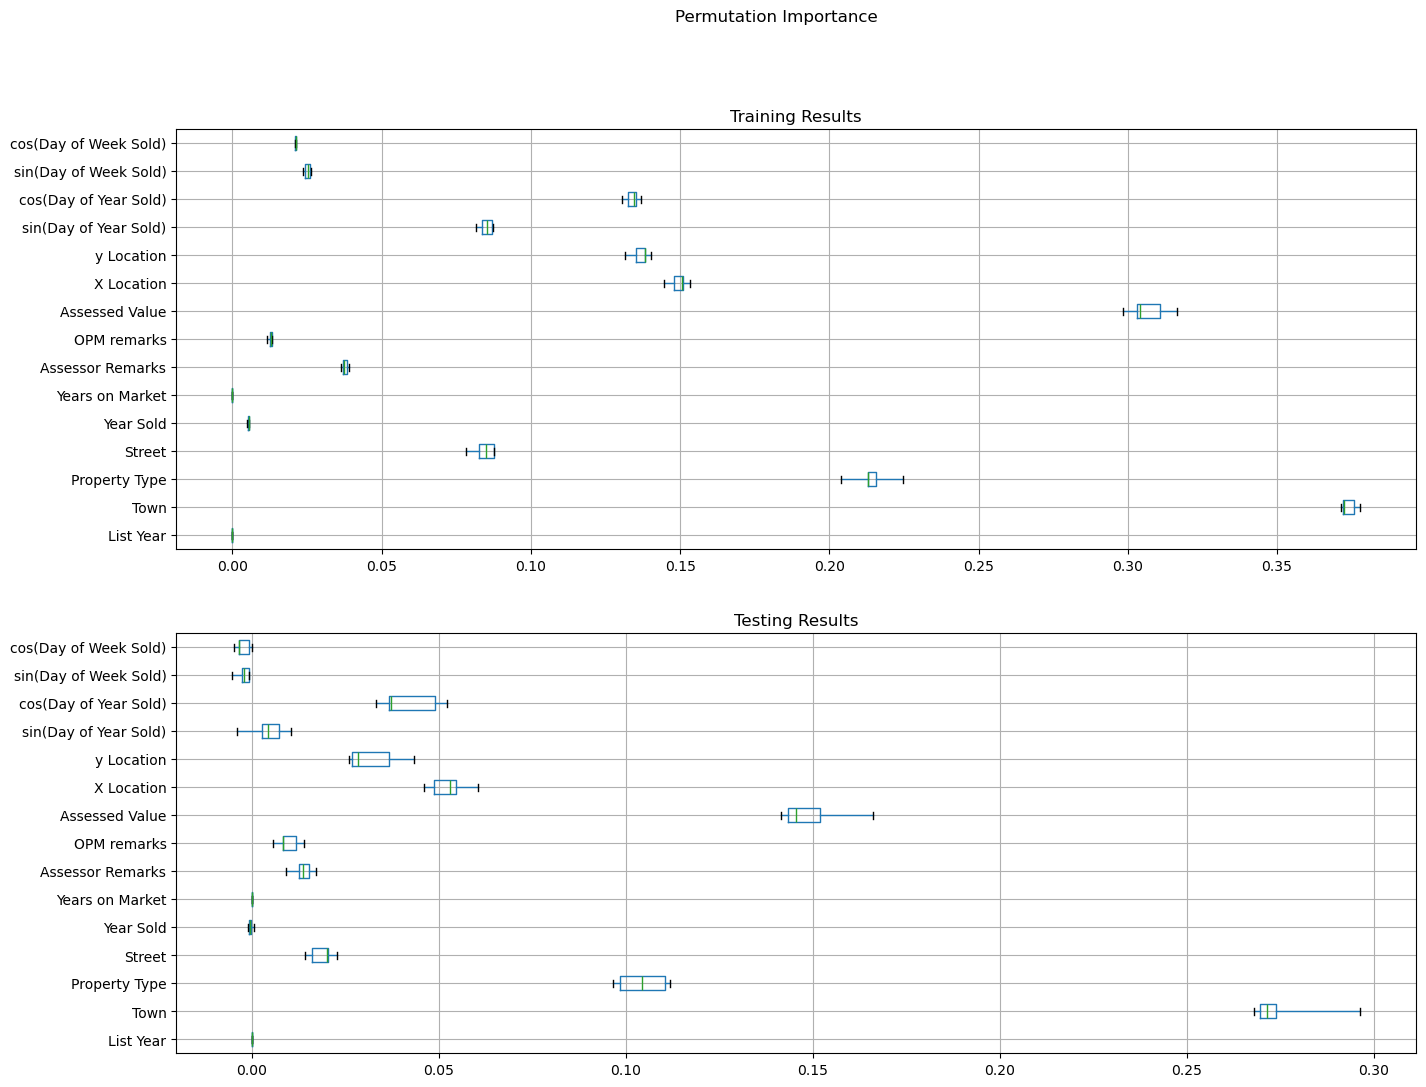

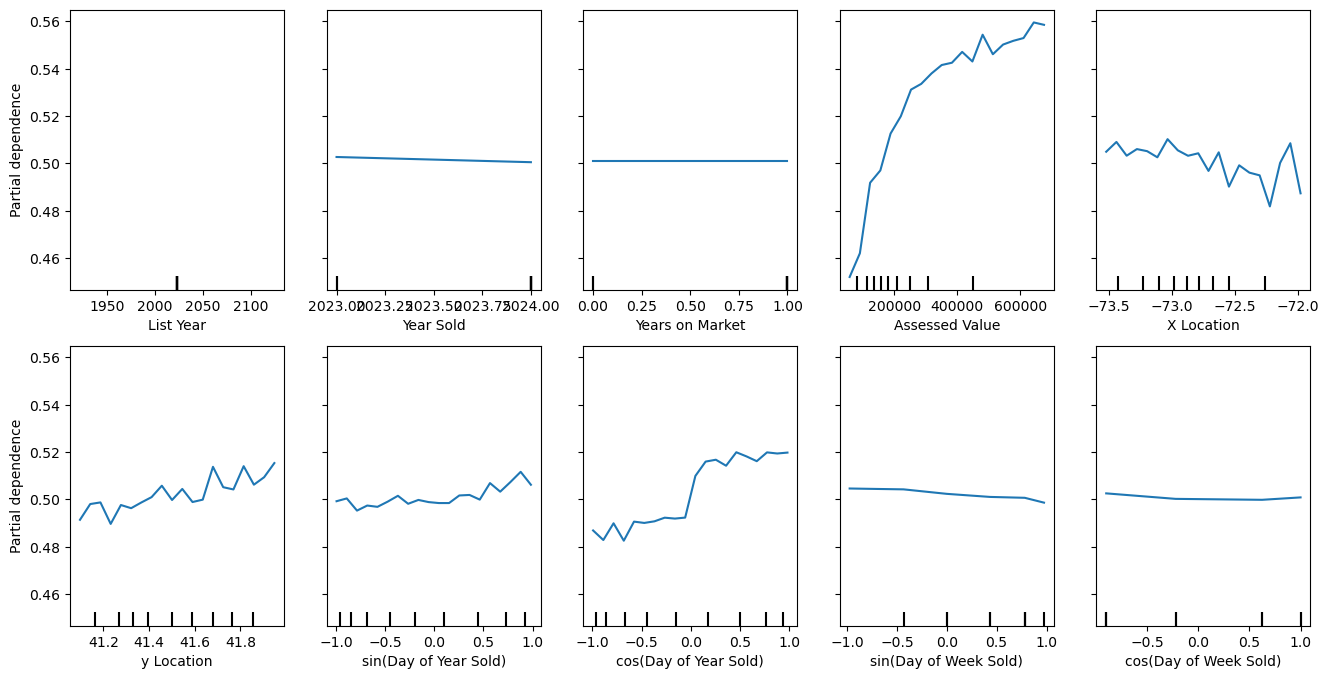

In [44]:
X_features = [
    'List Year',
    'Town',
    'Property Type',
    'Street',
    'Year Sold',
    'Years on Market',
    'Assessor Remarks',
    'OPM remarks',
    'Assessed Value',
    'X Location',
    'y Location',
    'sin(Day of Year Sold)',
    'cos(Day of Year Sold)',
    'sin(Day of Week Sold)',
    'cos(Day of Week Sold)',
]

y_feature = 'Sales Ratio'

estimators = make_estimators('tree')

for estimator in estimators:
    predict_and_plot(X2_train, X2_test, y2_train, y2_test, X_features, y_feature, estimator)

# Conclusion

Using a linear model like linear regression or ridge regression, we find that a model between housing data and housing sale amounts with an R^2 of 0.9. The feature that dominates the relationship is assessment value, where a linear model between assessment value and sale amounts achieves an R^2  of 0.9 as well. Without assessment value, the model performance drops below 0.2 and with only assesment value, the model gets close to 0.9 just using linreg. 

Linear models fail, however, to model the relationship between housing data and sale ratio. For predicting the sales ratio, however, complex tree-based models like XGBoost, LightGBM, RandomForest, etc... all plateau around R^2=0.55.

While the sales amount can be predicted to a high degree of certainty using housing data. The ratio of the assessed value of a house to the sales value of the house can vary greatly, and this dataset only provides enough data to explain 55% of the variance within the models.

For sale ratio, list year dominates. By analyzing the partial dependence plot for list year, it is apparent that sale ratio increased greatly for houses listed around 2008. This corresponds to the historic market crash in 2008, which explains why list year contributed greatly to predicting sale ratio